In [1]:
import logging
import time

import numpy as np
from joblib import hash, dump, load
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sys
print(os.path.abspath(''))
from os import path
sys.path.append( path.abspath(os.path.abspath('')) ) 
print(path.abspath(os.path.abspath('')) )


from microGrid.env.final_env import MyEnv as MG_two_storages_env
import microGrid.experiment.base_controllers as bc
from datetime import datetime
from microGrid.plot_MG_operation import plot_op
import tensorflow as tf
import pandas as pd
from stable_baselines3 import DQN

C:\WorkSpace\code
C:\WorkSpace\code


In [2]:
import csv 

def read_csv(f, sep=";", skip_line=0, end_line=None):
    f = open(f)
    res = None
    csv_file = csv.reader(f, delimiter=sep)
    for i, l in enumerate(csv_file):
        if i<skip_line:
            continue
        if end_line is not None and i > end_line:
            break
        if res is None:
            res= [[] for _ in l]
        for i in range(len(l)):
            res[i].append(l[i])
    return res


In [3]:
file_parse_cons = read_csv('data/conso-region-occitanie-2019-demi-h.csv')
file_parse_prod = read_csv('data/prod-region-occitanie-2019-demi-h.csv')

In [4]:
print(np.array(file_parse_prod)[:,0])

['Horodate' 'RÃ©gion' 'Code rÃ©gion' 'Plage de puissance injection'
 'FiliÃ¨re de production' 'Nb points injection'
 'Total Ã©nergie injectÃ©e (Wh)' 'Courbe Moyenne nÂ°1 (Wh)'
 'Indice reprÃ©sentativitÃ© Courbe nÂ°1 (%)' 'Courbe Moyenne nÂ°2 (Wh)'
 'Indice reprÃ©sentativitÃ© Courbe nÂ°2 (%)'
 'Courbe Moyenne nÂ°1 + nÂ°2 (Wh)'
 'Indice reprÃ©sentativitÃ© Courbe nÂ°1 + nÂ°2 (%)'
 'Jour max du mois (0/1)' 'Semaine max du mois (0/1)']


In [5]:
print(file_parse_cons[0][0],"|",file_parse_cons[7][0])
print(file_parse_prod[0][0],"|",file_parse_prod[6][0])
def cumul_data(mat_csv, column_need, column_uniqu=None, skip_line=0):
    res = []
    uniqu = dict()
    for i, val in enumerate(mat_csv[column_need]):
        if i<skip_line:
            continue
        if not bool(val.strip()):
            val=0
        if column_uniqu is None:
            res.append(float(val))
        elif mat_csv[column_uniqu][i] in uniqu:
            res[uniqu[mat_csv[column_uniqu][i]]] += float(val)
        else:
            uniqu[mat_csv[column_uniqu][i]] = len(res)
            res.append(float(val))
    return res


Horodate | Total Ã©nergie soutirÃ©e (Wh)
Horodate | Total Ã©nergie injectÃ©e (Wh)


In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

def add_n_by_n(l, n):
    res = []
    for i, val in enumerate(l):
        if i % n == 0:
            res.append(val)
        else:
            res[-1] += val
    return res


8760


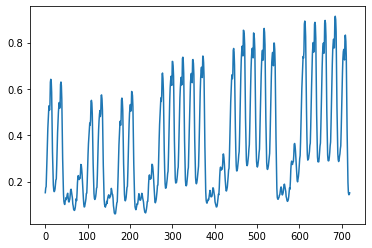

In [7]:
cons_res = cumul_data(file_parse_cons, 7, 0, skip_line=1)
cons_res2 = add_n_by_n(cons_res, 2)
print(len(cons_res2))
plt.plot(scaler.fit_transform(np.array(cons_res2).reshape(-1,1))[0:30*24])

30.416666666666668


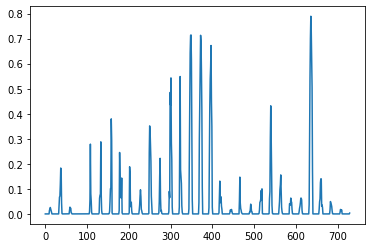

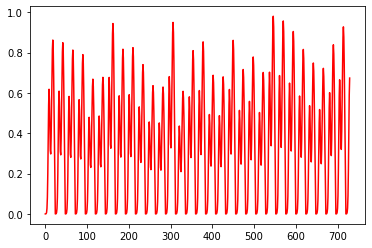

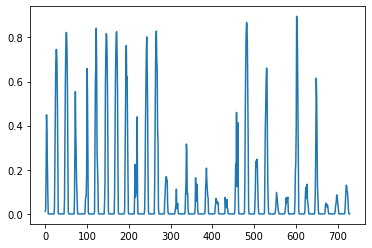

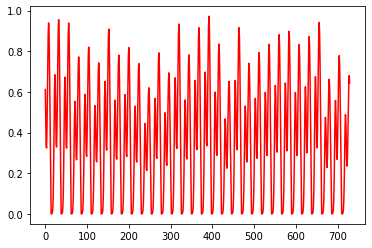

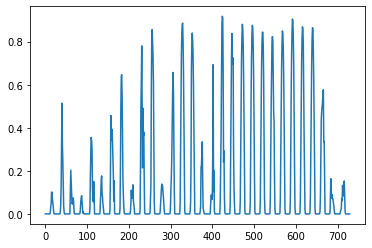

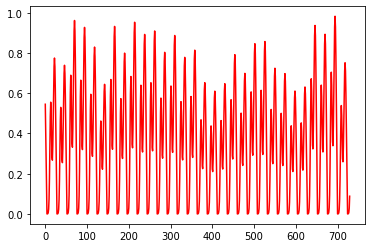

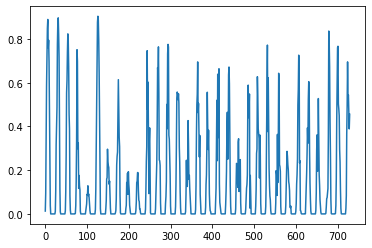

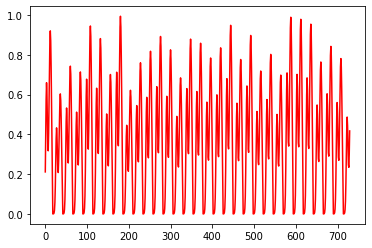

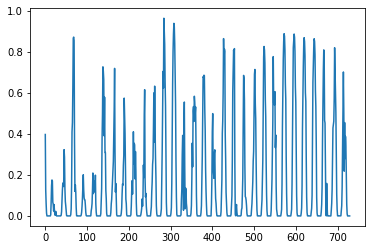

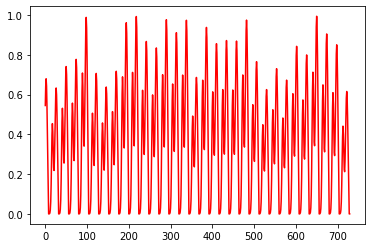

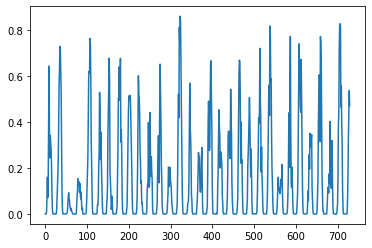

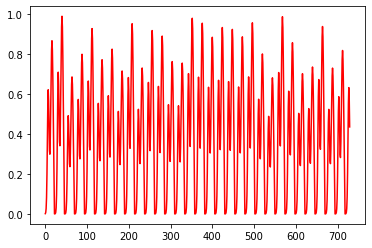

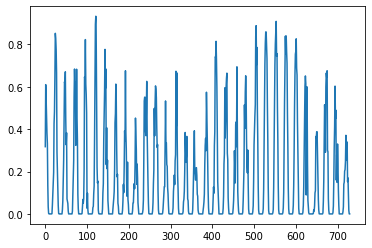

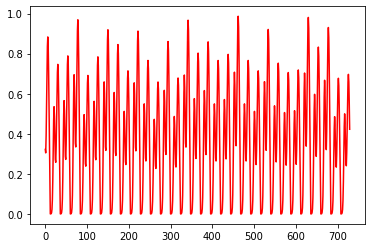

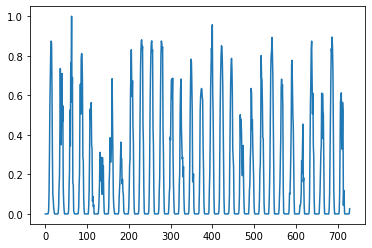

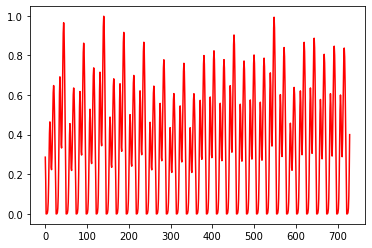

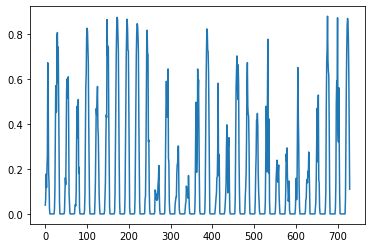

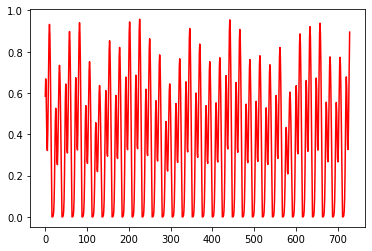

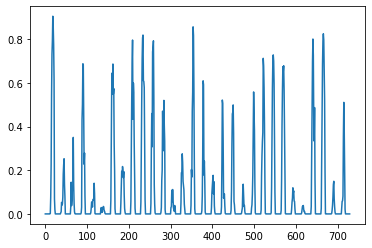

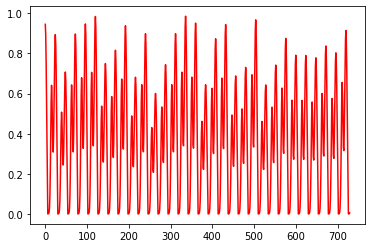

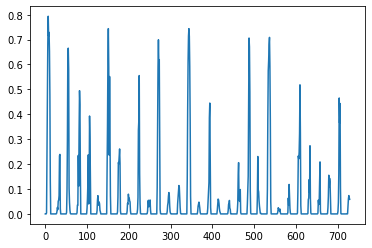

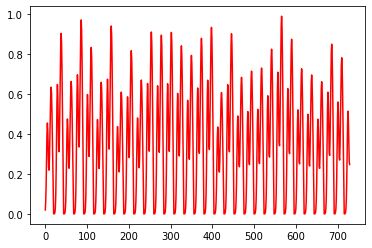

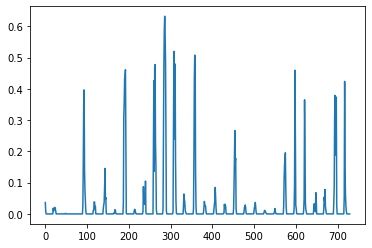

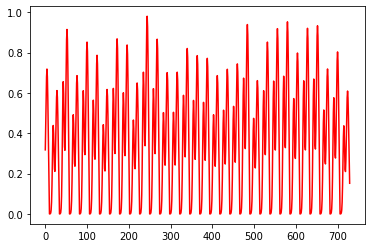

In [8]:
absolute_dir = os.path.abspath('')
prod = np.load(absolute_dir + "/microGrid/env/data/BelgiumPV_prod_test.npy")
cons = np.load(absolute_dir + "/microGrid/env/data/example_nondeterminist_cons_test.npy")
decoupe = 12
size_data = int(len(prod)/ decoupe)
print(size_data/24)
for i in range(decoupe):
    plt.plot(prod[i*size_data:(i+1)*size_data])
    plt.show()
    plt.plot(cons[i*size_data:(i+1)*size_data], color='r')
    plt.show()

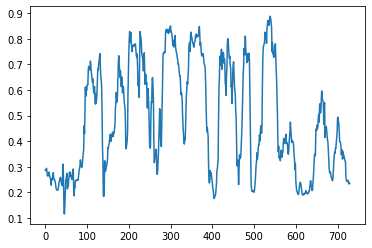

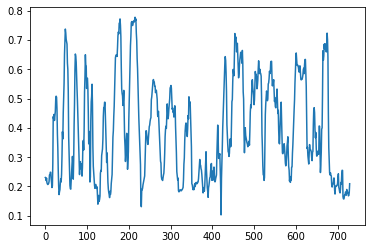

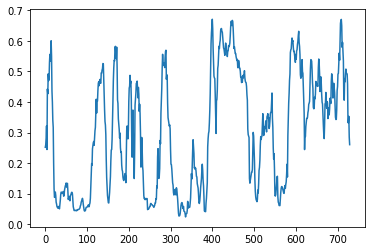

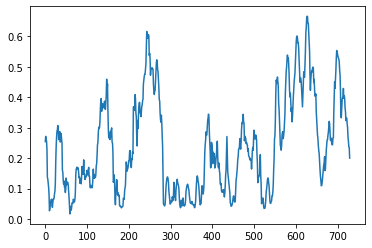

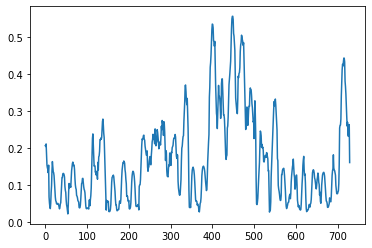

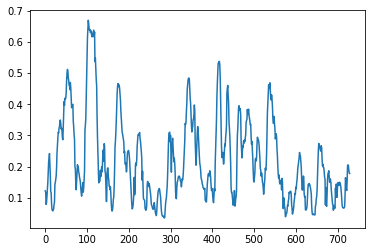

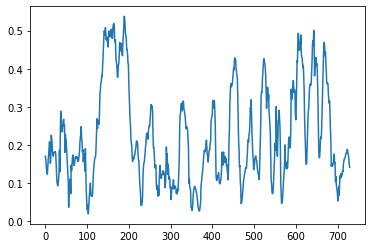

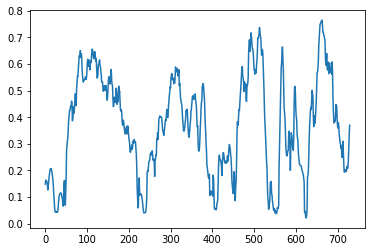

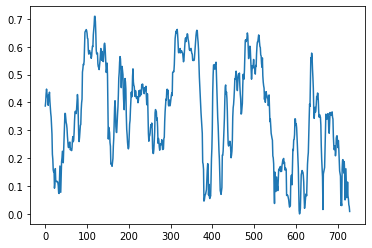

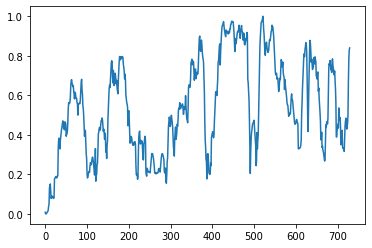

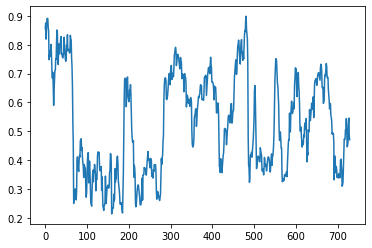

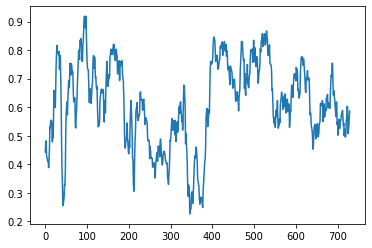

In [9]:
prod_res = cumul_data(file_parse_prod, 7, 0, skip_line=1)
prod_res2 = add_n_by_n(prod_res, 2)
for i in range(decoupe):
    plt.plot(scaler.fit_transform(np.array(prod_res2).reshape(-1,1))[i*size_data:(i+1)*size_data])
    plt.show()


['time' 'P' 'G(i)' 'H_sun' 'T2m' 'WS10m' 'Int']
(8760,)
0.1654415348020475 0.2601026093098457
0.12469619582601506 0.21892943974994133


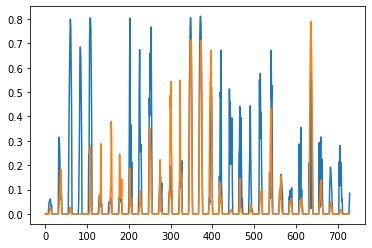

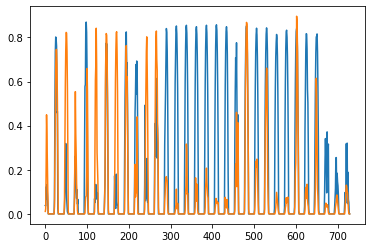

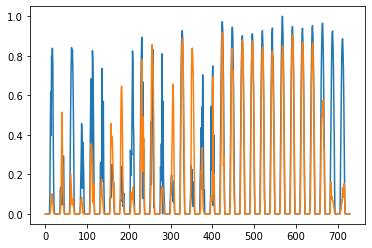

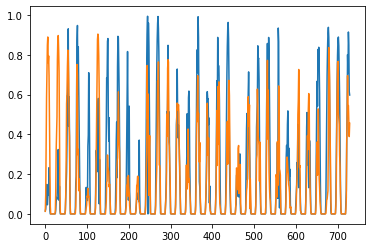

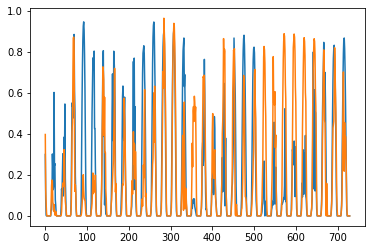

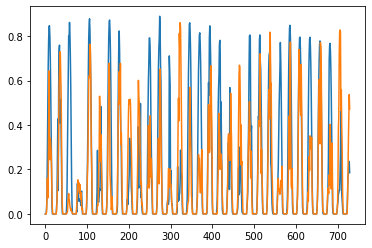

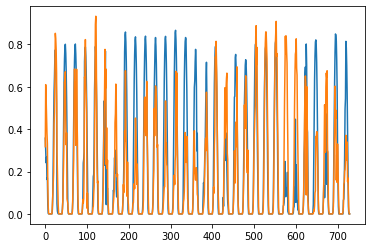

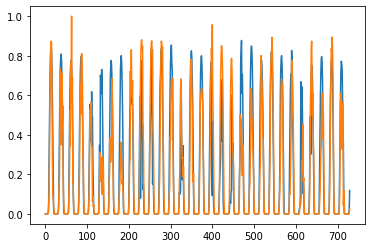

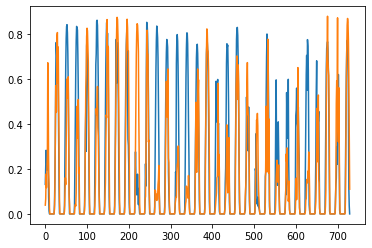

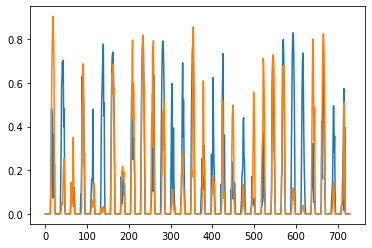

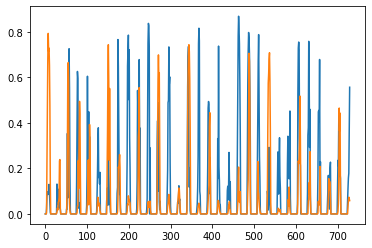

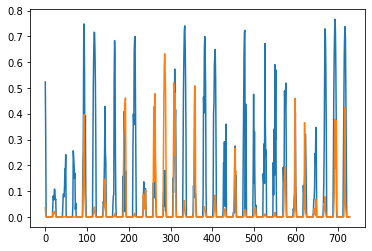

In [10]:
csv_prod2 = read_csv('data/2019_PV.csv', ";", 10, 8771)
print(np.array(csv_prod2)[:,0])
prod2 = cumul_data(csv_prod2, 1, column_uniqu=0, skip_line=1)



print(np.array(prod2).shape)
prod2 = scaler.fit_transform(np.array(prod2).reshape(-1,1))

print(np.mean(prod2), np.std(prod2))
print(np.mean(prod), np.std(prod))

for i in range(decoupe):
    plt.plot(prod2[i*size_data:(i+1)*size_data])
    plt.plot(prod[i*size_data:(i+1)*size_data])
    plt.show()

In [11]:

    
def plot_gene(best, dirname, filename, verbose=False, param=""):

    data = best.get_data()
    bestScores, allScores = best.get_score()
    """if len(bestScores[list(bestScores.keys())[0]]) < 5:
        shutil.rmtree(dirname + "/" + filename, ignore_errors=True)
        return"""
    print(data.keys())

    actions = data["action"]
    consumption = data["consumption"]
    production = data["production"]
    rewards = data["rewards"]
    battery_level = data["soc"]
    # plot_op(data["action"], data["consumption"], data["production"], data["rewards"], data["battery"], "test.png")
    i = 0
    plot_op(actions[0 + i:100 + i], consumption[0 + i:100 + i], production[0 + i:100 + i], rewards[0 + i:100 + i],
            battery_level[0 + i:100 + i], dirname + "/" + filename + "/" + filename + "_winter_.png")
    plt.title("winter")
    if verbose:
        plt.show()
    plt.clf()

    i = 180 * 24
    plot_op(actions[0 + i:100 + i], consumption[0 + i:100 + i], production[0 + i:100 + i], rewards[0 + i:100 + i],
            battery_level[0 + i:100 + i], dirname + "/" + filename + "/" + filename + "_summer_.png")
    plt.title("summer")
    if verbose:
        plt.show()
    plt.clf()

    i = 360 * 24
    plot_op(actions[0 + i:100 + i], consumption[0 + i:100 + i], production[0 + i:100 + i], rewards[0 + i:100 + i],
            battery_level[0 + i:100 + i], dirname + "/" + filename + "/" + filename + "_winter2_.png")
    plt.title("winter2")
    if verbose:
        plt.show()
    plt.clf()

    """key = "flow_H2"
    plt.plot(range(31 * 24), data[key][:31 * 24], label=key, color='b')
    key = "Buy_energy"
    plt.plot(range(31 * 24), data[key][:31 * 24], label=key, color='r')

    plt.legend()
    plt.xlabel("Number of hours")
    plt.ylabel("Score")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_plots.png")
    if verbose:
        plt.show()
    plt.clf()"""

    h = sns.jointplot(x=[battery_level[i] for i in range(len(actions)) if actions[i] == 0],
                      y=[consumption[i] - production[i] for i in range(len(actions)) if actions[i] == 0],
                      kind="hist", marginal_ticks=True)
    # JointGrid has a convenience function
    h.set_axis_labels('charge battery (%)', 'demand (W)', fontsize=16)
    h.fig.suptitle("distribution selon l'action de décharge")

    plt.savefig(dirname + "/" + filename + "/" + filename + "_plots_action0.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()

    h = sns.jointplot(x=[battery_level[i] for i in range(len(actions)) if actions[i] == 1],
                      y=[consumption[i] - production[i] for i in range(len(actions)) if actions[i] == 1],
                      kind="hist", marginal_ticks=True)
    # JointGrid has a convenience function
    h.set_axis_labels('charge battery (%)', 'demand (W)', fontsize=16)
    h.fig.suptitle("distribution selon l'action ne rien faire")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_plots_action1.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()

    h = sns.jointplot(x=[battery_level[i] for i in range(len(actions)) if actions[i] == 2],
                      y=[consumption[i] - production[i] for i in range(len(actions)) if actions[i] == 2],
                      kind="hist", marginal_ticks=True)
    # JointGrid has a convenience function
    h.set_axis_labels('charge battery (%)', 'demand (W)', fontsize=16)
    h.fig.suptitle("distribution selon l'action de charge")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_plots_action2.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()

    demande = [consumption[i] - production[i] for i in range(len(actions))]
    print("demande moyenne : ", np.mean(demande))
    print("demande std : ", np.std(demande))

    corr = pd.DataFrame.from_dict(bestScores)
    corr = corr.corr()
    plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, annot=True)
    plt.title("correlation entre les différentes valeurs de récompense")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_heatmap.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()


    corr = pd.DataFrame.from_dict(data)
    corr = corr.corr()
    plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, annot=True)
    plt.title("correlation entre tous les données")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_heatmap2.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()
    print("reward", np.sum(data["rewards"]))

    scaler = preprocessing.MinMaxScaler()

    for k in bestScores.keys():
        try:
            plt.plot(range(1,len(bestScores[k])+1), scaler.fit_transform(np.array(bestScores[k]).reshape(-1,1)),
                     label="score " + str(k))
        except Exception as e:
            print("error",k)
            print(e)
            plt.plot(range(1,len(bestScores[k])+1), bestScores[k], label="score " + str(k))

    plt.legend()
    plt.xlabel("pas pour chaque nouveaux meilleurs scores (sans unité)")
    plt.ylabel("score normalisé (sans unité)")
    plt.title("correlation entre tous les données")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_scoresbest.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()

    for k in allScores.keys():
        try:
            plt.plot(range(1, len(allScores[k])+1), allScores[k],
                     label="score " + str(k))
        except Exception as e:
            print("error",k)
            print(e)
            plt.plot(range(1, len(allScores[k])+1), allScores[k], label="score " + str(k))

    plt.legend()
    plt.xlabel("nombre d'épisode (sans unité)")
    plt.ylabel("score (sans unité)")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_scores.png", bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()

    for k in allScores.keys():
        try:
            plt.plot(range(1, len(allScores[k])+1), scaler.fit_transform(np.array(allScores[k]).reshape(-1,1)),
                     label="score " + str(k))
        except Exception as e:
            print("error",k)
            print(e)
            plt.plot(range(1, len(allScores[k])+1), scaler.fit_transform(np.array(allScores[k]).reshape(-1,1)), label="score " + str(k))

    plt.legend()
    plt.xlabel("nombre d'épisode (sans unité)")
    plt.ylabel("score normalisé (sans unité)")
    plt.savefig(dirname + "/" + filename + "/" + filename + "_scores_normed.png", bbox_inches = "tight")
    if verbose:
        plt.show()

    plt.clf()

    labels = 'discharge', 'none', 'charge'
    sizes = [len([1 for i in range(len(actions)) if actions[i] == 0]),
             len([1 for i in range(len(actions)) if actions[i] == 1]),
             len([1 for i in range(len(actions)) if actions[i] == 2])]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')

    plt.savefig(dirname + "/" + filename + "/" + filename + 'PieChart.png', bbox_inches = "tight")
    if verbose:
        plt.show()
    plt.clf()
    plt.close("all")

    with open(dirname + "/" + filename + "/" + filename + "data.csv", 'w') as f:
        keys = list(allScores.keys())
        for j in range(len(keys) - 1):
            f.write(str(keys[j]) + ";")
        f.write(str(keys[-1]) + "\n")
        print(allScores)
        print(keys[0],":slen", len(allScores[keys[0]]))
        for i in range(len(allScores[keys[0]])): # same size in allScores
            for j in range(len(keys) - 1):
                f.write(str(allScores[keys[j]][i]) + ";")
            f.write(str(allScores[keys[-1]][i]) + "\n")



def test(dirname, filename,
         patience,
         train_freq,
         learning_rate,
         buffer_size,
         batch_size,
         discount,
         eps_decay,
         freeze,
         dict_env,
         env,
         env_valid,
         tau=1.,
         verbose = False):





    # --- init model ---
    print('MlpPolicy',
          "learning_rate=", learning_rate,
          "buffer_size=", buffer_size,
          "batch_size=", batch_size,
          "gamma=", discount,
          "exploration_initial_eps=", Defaults.EPSILON_START,
          "exploration_final_eps=", Defaults.EPSILON_MIN,
          "exploration_fraction=", eps_decay,
          "target_update_interval=", freeze,
          "size_histo=", EnvParam.LENGTH_HISTORY,
          "train_freq=", train_freq,
          "tau=", tau, sep='\n')
    if not os.path.exists(dirname + "/" + filename):
        os.makedirs(dirname + "/" + filename)

    f = open(dirname+ "/" + filename + "/" + filename + "hyperparam.txt", "a")
    f.write('MlpPolicy\n' +
          "learning_rate=" +  str(learning_rate) +
          "\nbuffer_size=" +  str(buffer_size) +
          "\nbatch_size=" +  str(batch_size) +
          "\ngamma=" +  str(discount) +
          "\nexploration_initial_eps=" +  str(Defaults.EPSILON_START) +
          "\nexploration_final_eps=" +  str(Defaults.EPSILON_MIN) +
          "\nexploration_fraction=" +  str(eps_decay) +
          "\ntarget_update_interval=" +  str(freeze) +
          "\ntrain_freq=" + str(train_freq) +
          "\nsize_histo=" + str(EnvParam.LENGTH_HISTORY) +
          "\nPREDICTION=" + str(EnvParam.PREDICTION) +
          "\nEQUINOX=" + str(EnvParam.EQUINOX) +
          "\ntau=" + str(tau)
    )
    f.close()

    print(len(env.observation_space.sample()))

    model = DQN('MlpPolicy', env,
                learning_rate=learning_rate,
                buffer_size=buffer_size,
                batch_size=batch_size,
                gamma=discount,
                exploration_initial_eps=Defaults.EPSILON_START,
                exploration_final_eps=Defaults.EPSILON_MIN,
                exploration_fraction=eps_decay,
                target_update_interval=freeze,
                train_freq=train_freq,
                tau=tau,
                verbose=0,
                seed=3)

    best = BestCallback(env_valid, dict_env, patience, filename, dirname)
    try:
        start = time.time()
        model.learn(Defaults.EPISODE * Defaults.STEPS_PER_EPISODE,
                    callback=best)  # callback=[verbose_callback, eps_callback, best_callback]
        res = time.time() - start
        print("time to train and valid:", int(res / 3600), "h", int((res % 3600) / 60), "min", res % 60, "s")
    except KeyboardInterrupt:
        print('Hello user you have KeyboardInterrupt.')
    plot_gene(best, dirname, filename, verbose=verbose)

C:\WorkSpace\code
C:\WorkSpace\code
Sample of the consumption profile (kW): [4.88090280e-05 4.08636652e-04 2.66459683e-03 1.35325348e-02
 5.35289841e-02 1.64925998e-01 3.95869422e-01 7.40576948e-01
 1.08118010e+00 1.23674331e+00 1.12378457e+00 8.51875992e-01
 6.28731540e-01 5.94891051e-01 7.62627204e-01 1.05973501e+00
 1.38386090e+00 1.63210044e+00 1.72495565e+00 1.63169652e+00
 1.38119778e+00 1.04620892e+00 7.09130415e-01 4.30109338e-01]
Min of the consumption profile (kW): 3.569456443385281e-05
Max of the consumption profile (kW): 2.1
Average consumption per day train (kWh): 18.56458726184315
self.production_train brefore
[0. 0. 0. ... 0. 0. 0.]
self.production_train after
[0. 0. 0. ... 0. 0. 0.]
Sample of the production profile (kW): [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00225469 0.01691014 0.
 0.         0.         0.         0.         0.         0.        ]
Min of t

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-08-35-39_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-08-35-39_score:-2400.2369272055876
train score:-3082.704041
new best best13_05_2022-08-35-39_score:-2134.991577429042
train score:-2890.29449
new best best13_05_2022-08-35-39_score:-2057.1474825405458
train score:-2634.581018
new best best13_05_2022-08-35-39_score:-2044.0271555133295
train score:-2593.776445
new best best13_05_2022-08-35-39_score:-1960.231629937436
train score:-2495.079382
new best best13_05_2022-08-35-39_score:-1624.7340477151447
train score:-2157.057987
new best best13_05_2022-08-35-39_score:-1520.3832846003716
train score:-2066.214061
new best best13_05_2022-08-35-39_score:-1293.3422314928976
train score:-1844.565004
new best best13_05_2022-08-35-39_score:-1193.4839967764128
train score:-1714.356356
new best best13_05_2022-08-35-39_score:-1139.033270576445
train score:-1612.490871
new best best13_05_2022-08-35-39_score:-1088.785310888139
train score:-1449.347292

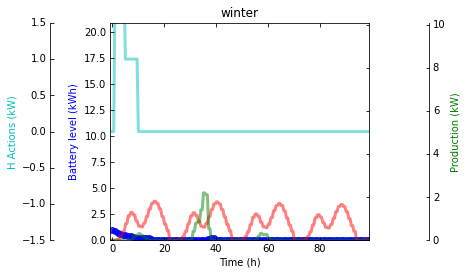

In this plot, total score5.170000000000001


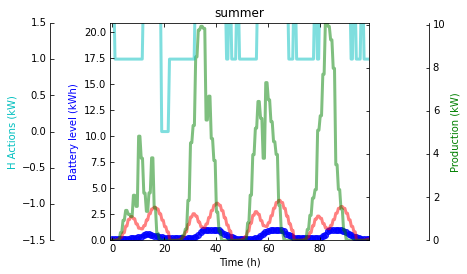

In this plot, total score-15.588651417173912


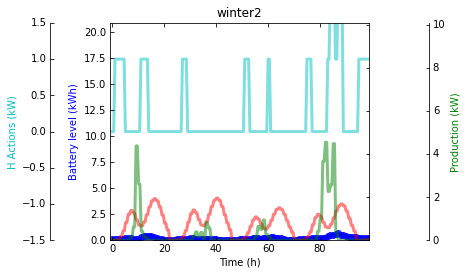

<Figure size 432x288 with 0 Axes>

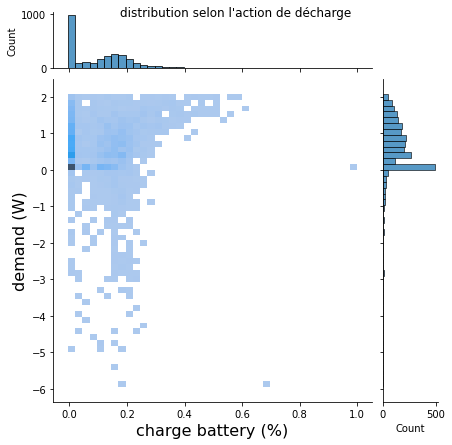

<Figure size 432x288 with 0 Axes>

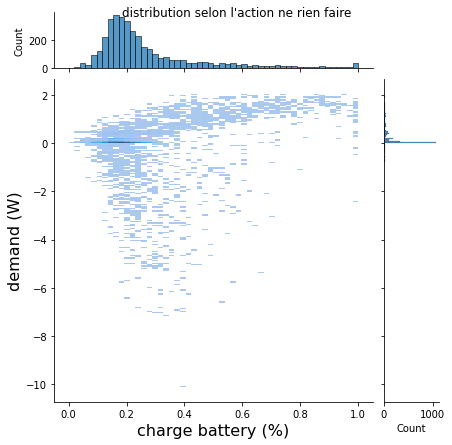

<Figure size 432x288 with 0 Axes>

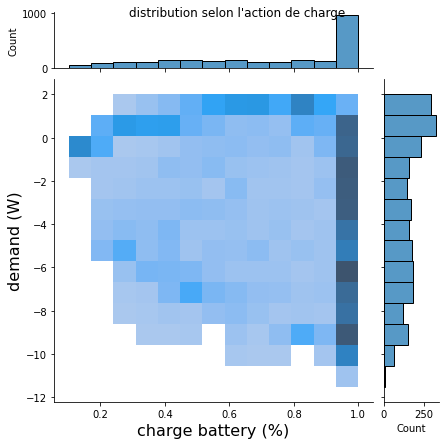

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

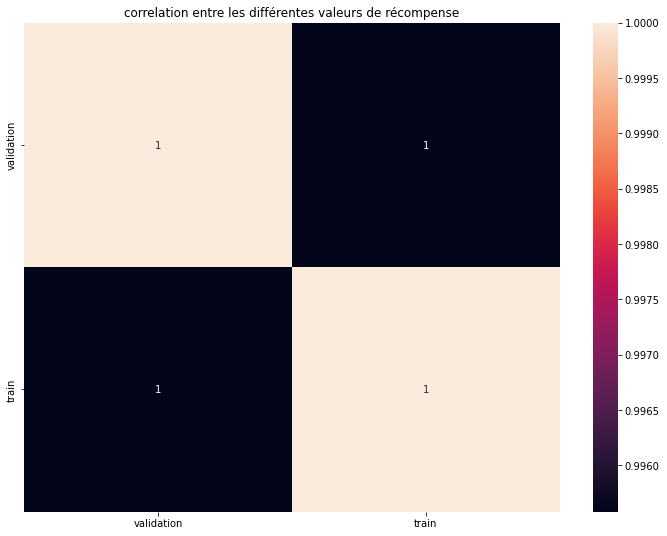

<Figure size 432x288 with 0 Axes>

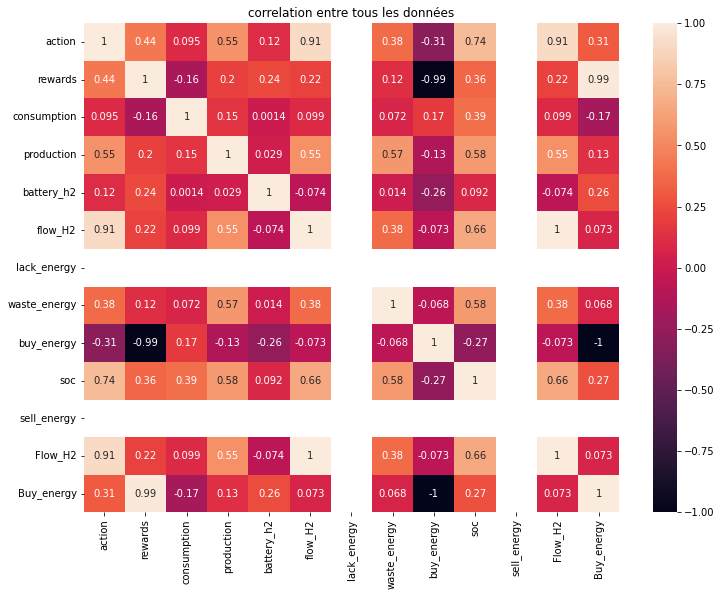

reward -1017.6126899907081


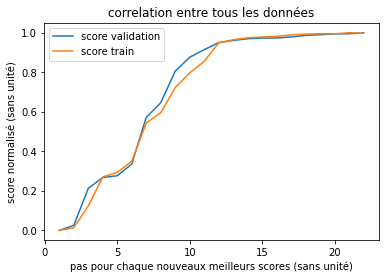

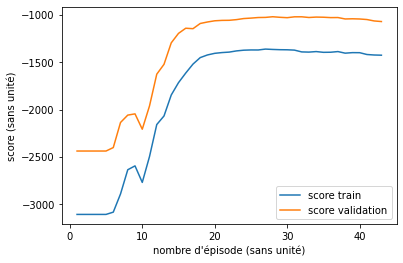

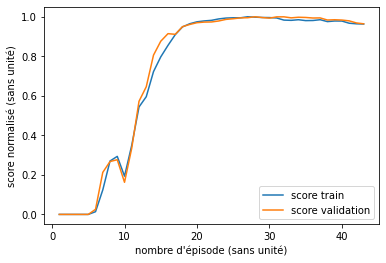

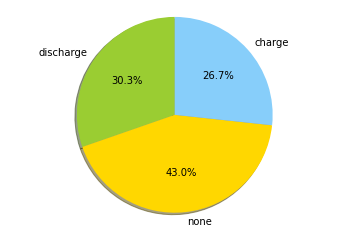

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3082.704041, -2890.29449, -2634.581018, -2593.776445, -2768.517528, -2495.079382, -2157.057987, -2066.214061, -1844.565004, -1714.356356, -1612.490871, -1518.029262, -1449.347292, -1421.310228, -1404.249756, -1396.292733, -1391.291316, -1378.693385, -1371.147714, -1368.549851, -1368.892352, -1359.466857, -1363.170834, -1365.863704, -1366.797195, -1370.330678, -1389.257898, -1391.326913, -1385.787294, -1393.681811, -1392.71217, -1385.719748, -1402.498301, -1396.973193, -1397.510159, -1416.705967, -1421.927929, -1423.99157], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2400.2369272055876, -2134.991577429042, -2057.1474825405458, -2044.0271555133295, -2206.2640501795686, -1960.231629937436, -1624.7340477151447, -1520.3832846003716, -1293.3422314928976, -1193.4839967764128, -1139.033270576445, -1143.7524596689618, -1

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-08-53-39_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-08-53-39_score:-2400.8101525398743
train score:-3078.938581
new best best13_05_2022-08-53-39_score:-2163.6795275312834
train score:-2902.585051
new best best13_05_2022-08-53-39_score:-2069.4573392846796
train score:-2633.445009
new best best13_05_2022-08-53-39_score:-1887.4266003712837
train score:-2405.25744
new best best13_05_2022-08-53-39_score:-1576.999793375915
train score:-2096.321861
new best best13_05_2022-08-53-39_score:-1482.1623297614424
train score:-2021.77202
new best best13_05_2022-08-53-39_score:-1302.7142395371848
train score:-1835.357864
new best best13_05_2022-08-53-39_score:-1185.1874274918955
train score:-1742.106813
new best best13_05_2022-08-53-39_score:-1148.0641028591563
train score:-1616.159786
new best best13_05_2022-08-53-39_score:-1099.9297121771742
train score:-1454.552502
new best best13_05_2022-08-53-39_score:-1073.0672788931406
train score:-1421.2576

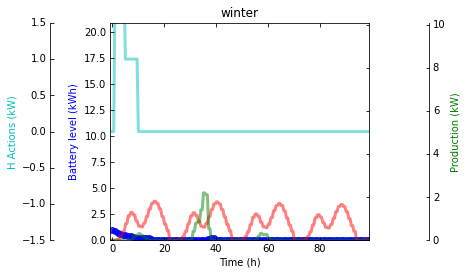

In this plot, total score5.170000000000001


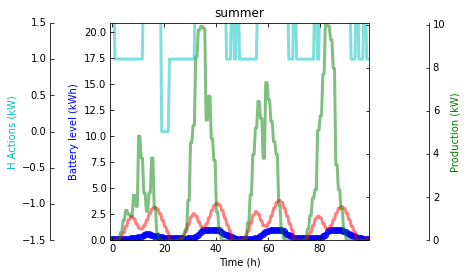

In this plot, total score-15.457796253357204


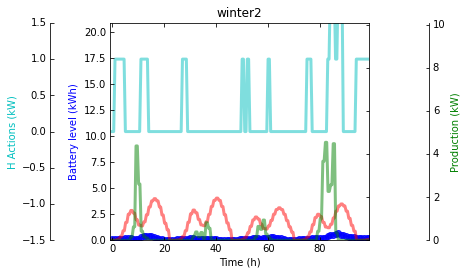

<Figure size 432x288 with 0 Axes>

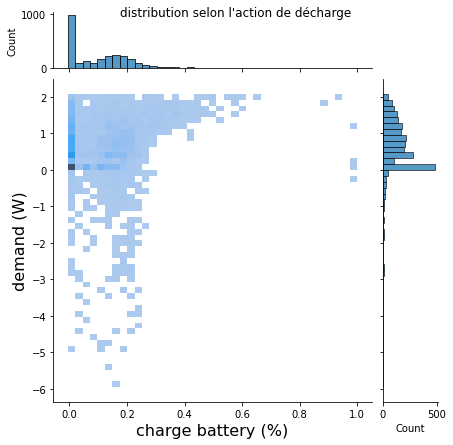

<Figure size 432x288 with 0 Axes>

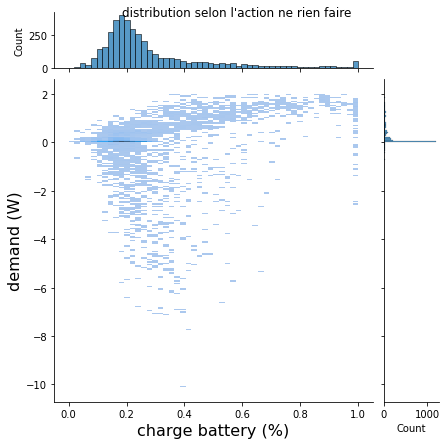

<Figure size 432x288 with 0 Axes>

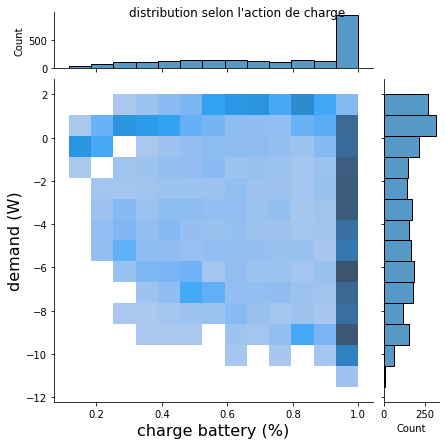

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

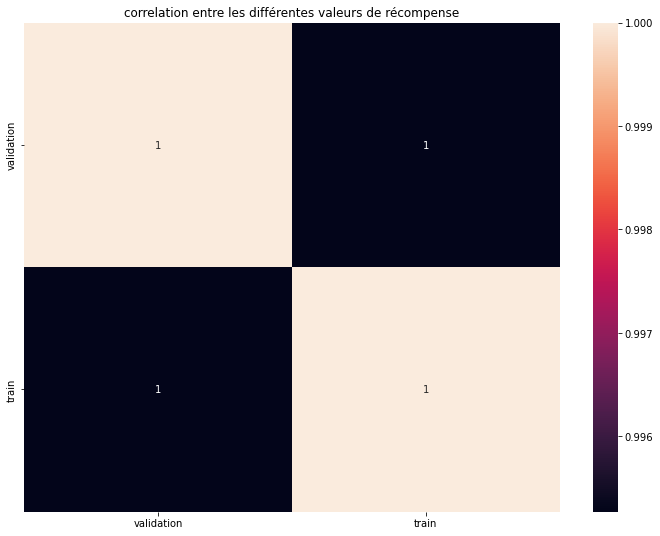

<Figure size 432x288 with 0 Axes>

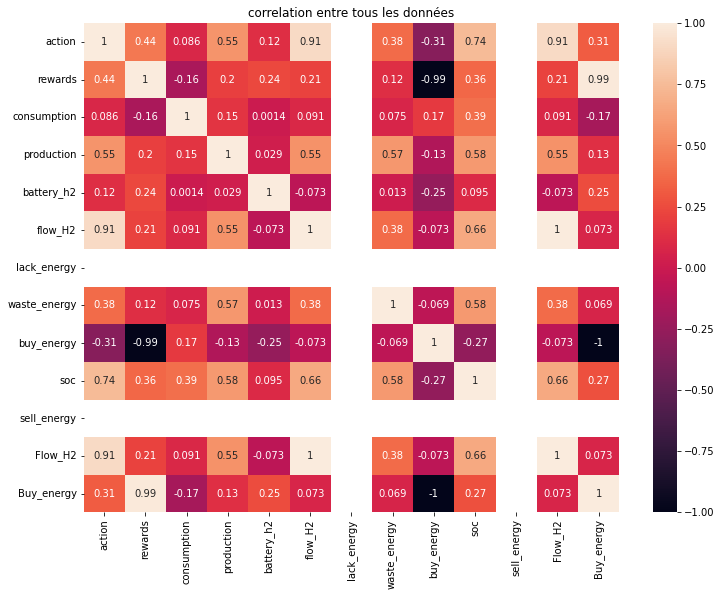

reward -1023.5579373920166


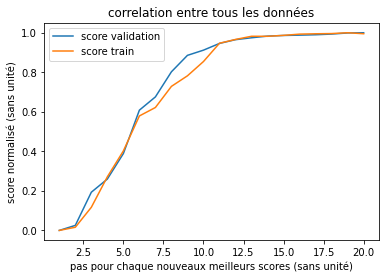

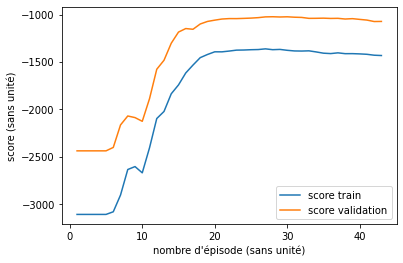

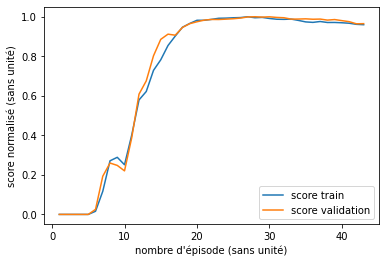

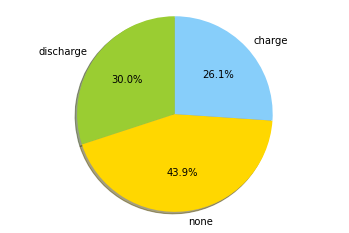

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.938581, -2902.585051, -2633.445009, -2602.700151, -2668.446117, -2405.25744, -2096.321861, -2021.77202, -1835.357864, -1742.106813, -1616.159786, -1532.8508, -1454.552502, -1421.257699, -1393.160956, -1393.39057, -1385.207038, -1375.524526, -1374.200718, -1371.079729, -1369.223734, -1361.998314, -1370.712628, -1367.836751, -1377.2329, -1383.96848, -1385.084805, -1382.836709, -1394.365733, -1407.574347, -1411.763327, -1404.005329, -1412.698839, -1412.379447, -1415.091683, -1419.297413, -1428.91786, -1432.267505], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2400.8101525398743, -2163.6795275312834, -2069.4573392846796, -2086.3891061723625, -2125.47115608272, -1887.4266003712837, -1576.999793375915, -1482.1623297614424, -1302.7142395371848, -1185.1874274918955, -1148.0641028591563, -1155.5388657459189, -1099.92

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-09-12-22_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-09-12-22_score:-2398.634131083156
train score:-3083.725652
new best best13_05_2022-09-12-22_score:-2188.715008348692
train score:-2930.352213
new best best13_05_2022-09-12-22_score:-2186.081850475857
train score:-2893.859993
new best best13_05_2022-09-12-22_score:-2080.5729379386103
train score:-2626.016178
new best best13_05_2022-09-12-22_score:-2021.3114638453699
train score:-2514.701435
new best best13_05_2022-09-12-22_score:-1735.016211577531
train score:-2277.412422
new best best13_05_2022-09-12-22_score:-1532.5349304842894
train score:-2040.633715
new best best13_05_2022-09-12-22_score:-1290.79797792311
train score:-1823.894837
new best best13_05_2022-09-12-22_score:-1220.38776581829
train score:-1750.089098
new best best13_05_2022-09-12-22_score:-1198.4792917699087
train score:-1635.817842
new best best13_05_2022-09-12-22_score:-1197.1110821016046
train score:-1574.463057
ne

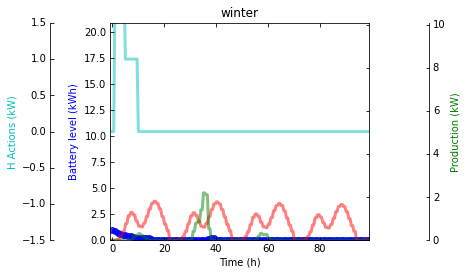

In this plot, total score5.170000000000001


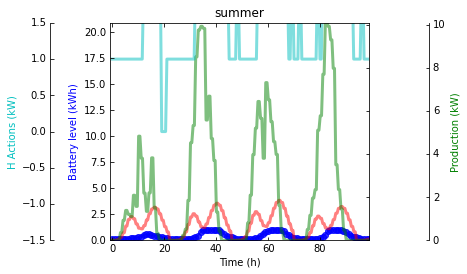

In this plot, total score-16.085915248664833


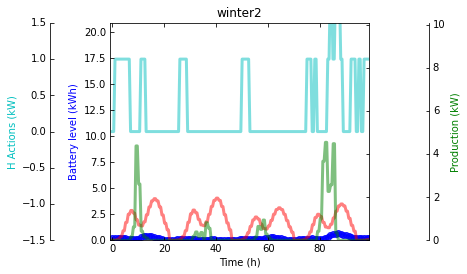

<Figure size 432x288 with 0 Axes>

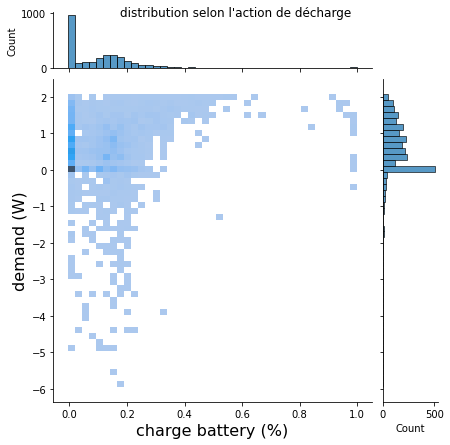

<Figure size 432x288 with 0 Axes>

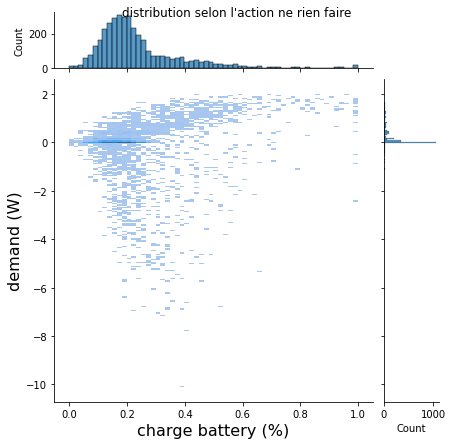

<Figure size 432x288 with 0 Axes>

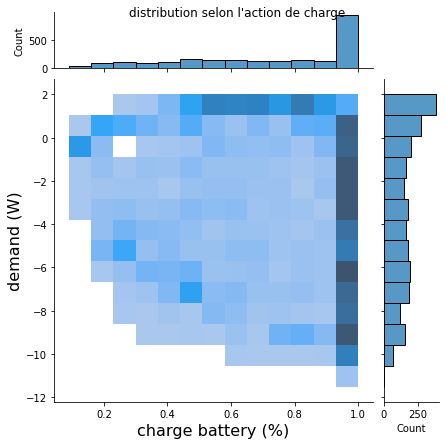

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

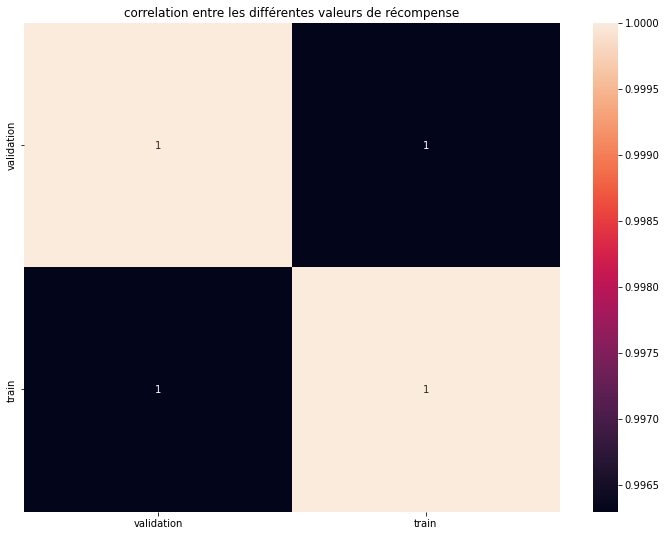

<Figure size 432x288 with 0 Axes>

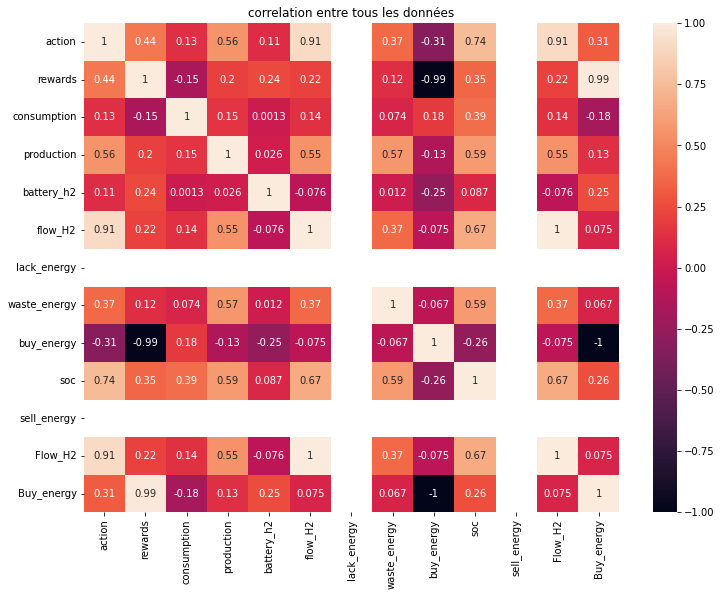

reward -1018.8650874799278


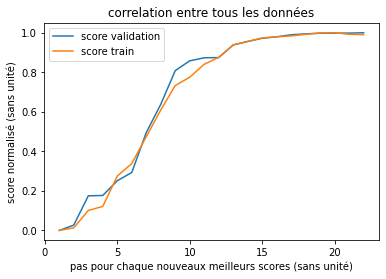

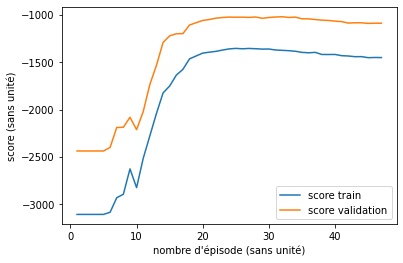

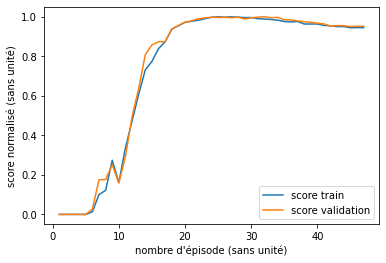

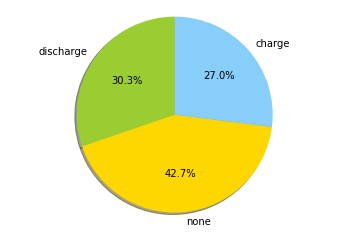

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3083.725652, -2930.352213, -2893.859993, -2626.016178, -2823.799007, -2514.701435, -2277.412422, -2040.633715, -1823.894837, -1750.089098, -1635.817842, -1574.463057, -1464.030212, -1432.998097, -1402.786411, -1393.063336, -1384.441694, -1370.634417, -1358.458188, -1353.13472, -1357.276653, -1353.728629, -1356.626376, -1360.633401, -1359.618942, -1370.18501, -1373.678517, -1377.350253, -1383.515669, -1395.348057, -1399.603466, -1395.145528, -1417.382712, -1417.736347, -1417.271645, -1430.18387, -1433.456223, -1440.805178, -1439.991345, -1451.258287, -1449.155132, -1449.909938], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2398.634131083156, -2188.715008348692, -2186.081850475857, -2080.5729379386103, -2210.954094406203, -2021.3114638453699, -1735.016211577531, -1532.5349304842894, -1290.79797792311, -1220.3877658

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-09-29-12_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-09-29-12_score:-2402.484472470249
train score:-3077.083518
new best best13_05_2022-09-29-12_score:-2191.5665510152467
train score:-2931.738666
new best best13_05_2022-09-29-12_score:-2134.6715986680865
train score:-2769.450196
new best best13_05_2022-09-29-12_score:-2040.5243875833985
train score:-2547.931627
new best best13_05_2022-09-29-12_score:-1840.7706623166669
train score:-2328.408058
new best best13_05_2022-09-29-12_score:-1518.180063040847
train score:-2054.176284
new best best13_05_2022-09-29-12_score:-1481.0070900387072
train score:-2021.408999
new best best13_05_2022-09-29-12_score:-1311.4818743313008
train score:-1816.985847
new best best13_05_2022-09-29-12_score:-1169.4393238956254
train score:-1722.650022
new best best13_05_2022-09-29-12_score:-1147.2607152231503
train score:-1617.319511
new best best13_05_2022-09-29-12_score:-1138.249523394661
train score:-1511.1795

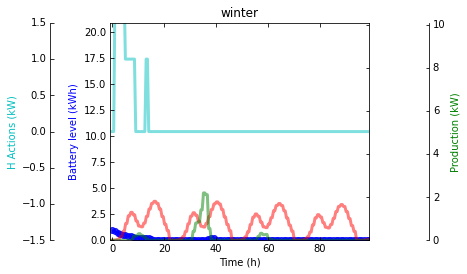

In this plot, total score5.170000000000001


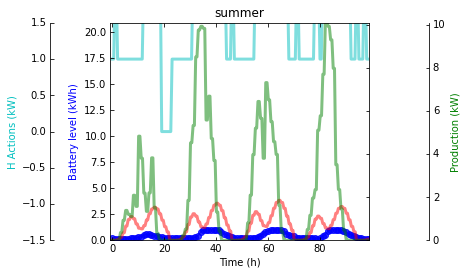

In this plot, total score-15.15368184313957


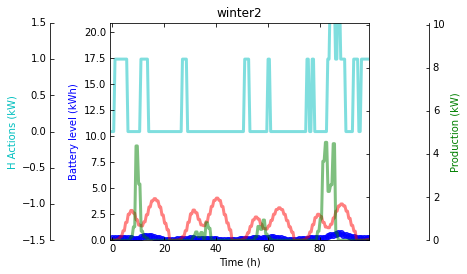

<Figure size 432x288 with 0 Axes>

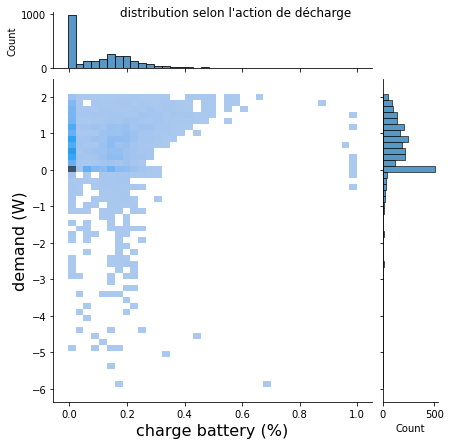

<Figure size 432x288 with 0 Axes>

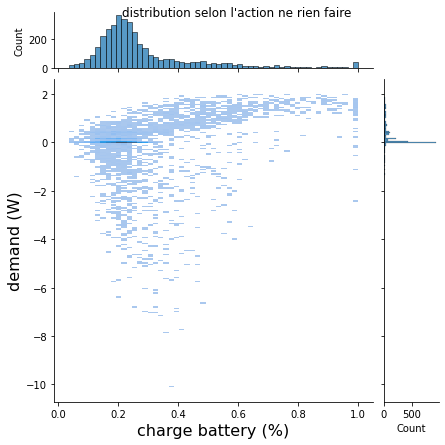

<Figure size 432x288 with 0 Axes>

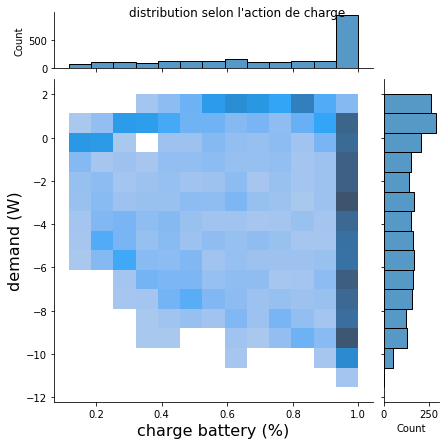

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

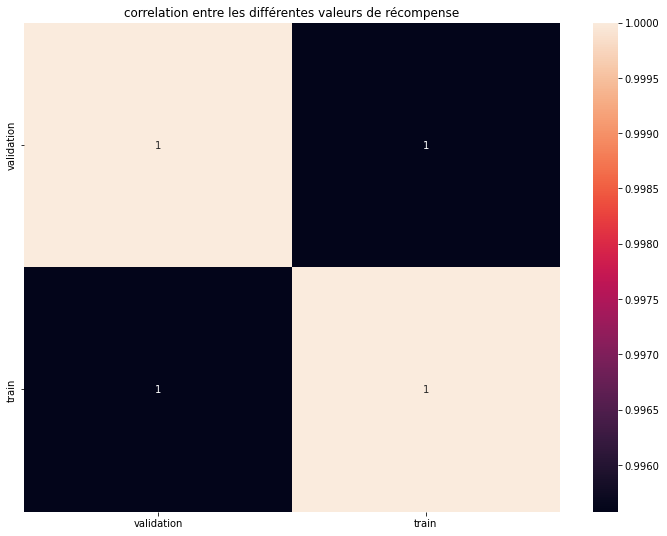

<Figure size 432x288 with 0 Axes>

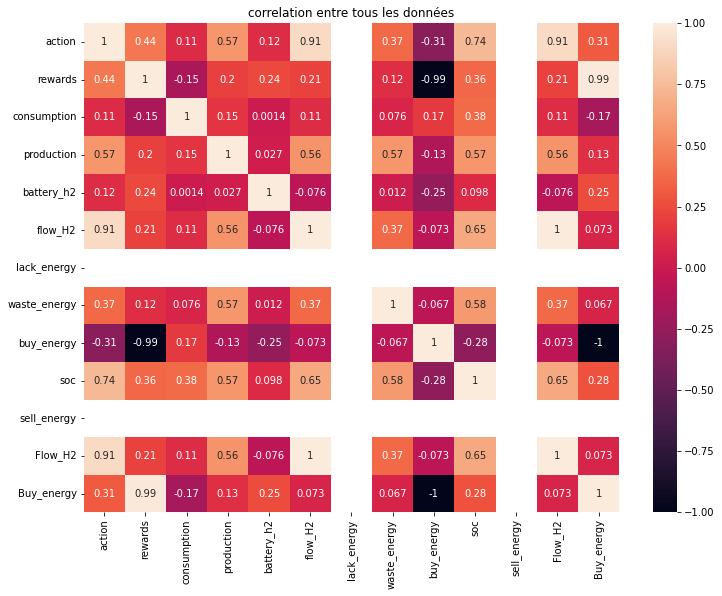

reward -1004.4842645919045


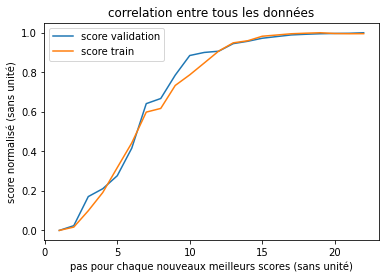

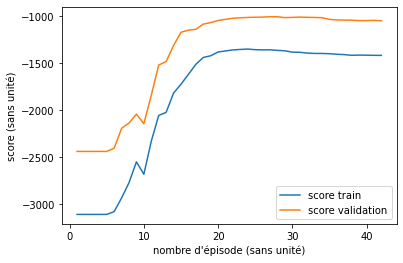

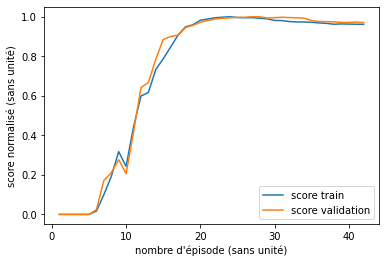

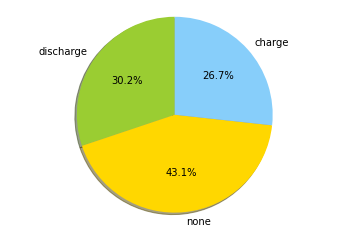

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3077.083518, -2931.738666, -2769.450196, -2547.931627, -2679.534642, -2328.408058, -2054.176284, -2021.408999, -1816.985847, -1722.650022, -1617.319511, -1511.179582, -1437.978779, -1419.429274, -1379.277025, -1368.383558, -1357.201885, -1352.23436, -1348.116396, -1354.833834, -1356.815687, -1356.319216, -1362.055568, -1366.770681, -1380.877923, -1382.48164, -1391.044441, -1394.512954, -1395.080331, -1397.666669, -1403.411873, -1407.125269, -1414.623441, -1412.153211, -1413.456181, -1414.683552, -1415.475613], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2402.484472470249, -2191.5665510152467, -2134.6715986680865, -2040.5243875833985, -2142.2024546759203, -1840.7706623166669, -1518.180063040847, -1481.0070900387072, -1311.4818743313008, -1169.4393238956254, -1147.2607152231503, -1138.249523394661, -1083.333161511

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-09-43-50_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-09-43-50_score:-2404.458051698173
train score:-3079.240213
new best best13_05_2022-09-43-50_score:-2193.052109599579
train score:-2932.544981
new best best13_05_2022-09-43-50_score:-2134.6670937036106
train score:-2796.726815
new best best13_05_2022-09-43-50_score:-2043.709279567891
train score:-2531.730413
new best best13_05_2022-09-43-50_score:-1804.454168182303
train score:-2271.63712
new best best13_05_2022-09-43-50_score:-1509.6100847738926
train score:-2034.591563
new best best13_05_2022-09-43-50_score:-1477.5201642281318
train score:-1993.304937
new best best13_05_2022-09-43-50_score:-1270.6484231042414
train score:-1777.05046
new best best13_05_2022-09-43-50_score:-1147.8100339949597
train score:-1669.638337
new best best13_05_2022-09-43-50_score:-1139.6012709223796
train score:-1537.998826
new best best13_05_2022-09-43-50_score:-1122.229934924202
train score:-1495.990741
n

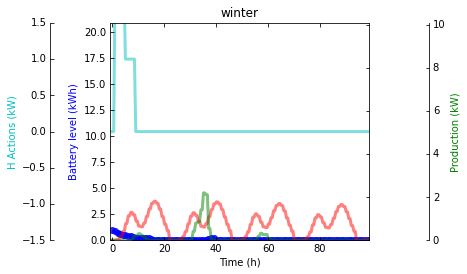

In this plot, total score5.17


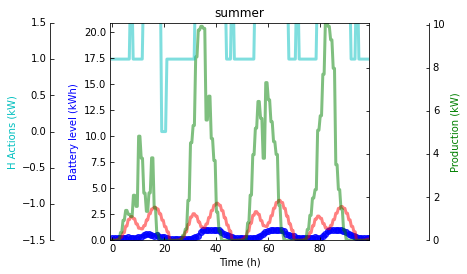

In this plot, total score-15.26368184313957


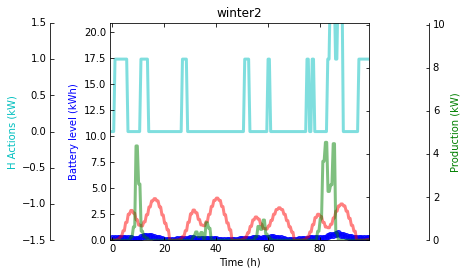

<Figure size 432x288 with 0 Axes>

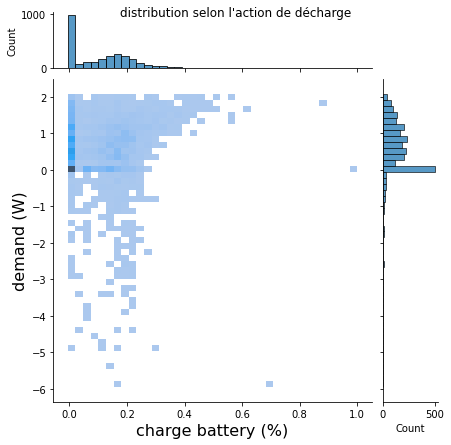

<Figure size 432x288 with 0 Axes>

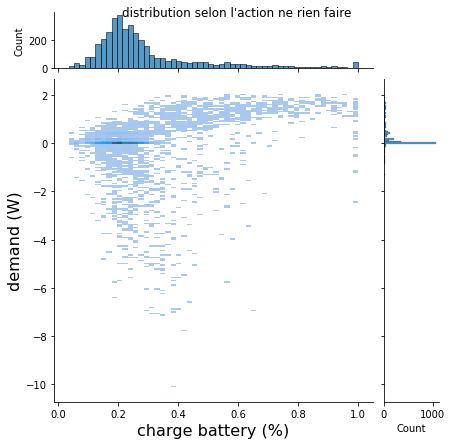

<Figure size 432x288 with 0 Axes>

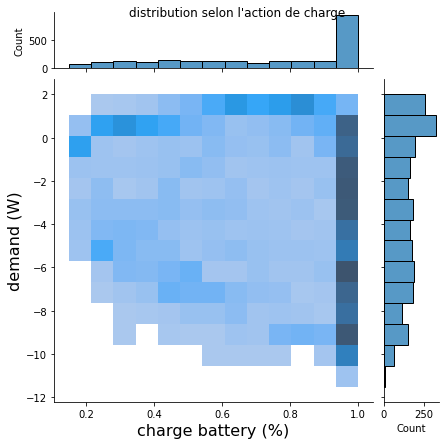

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

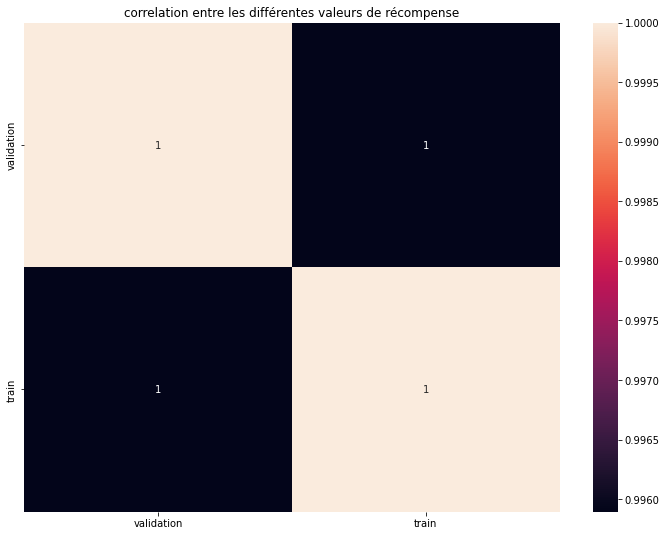

<Figure size 432x288 with 0 Axes>

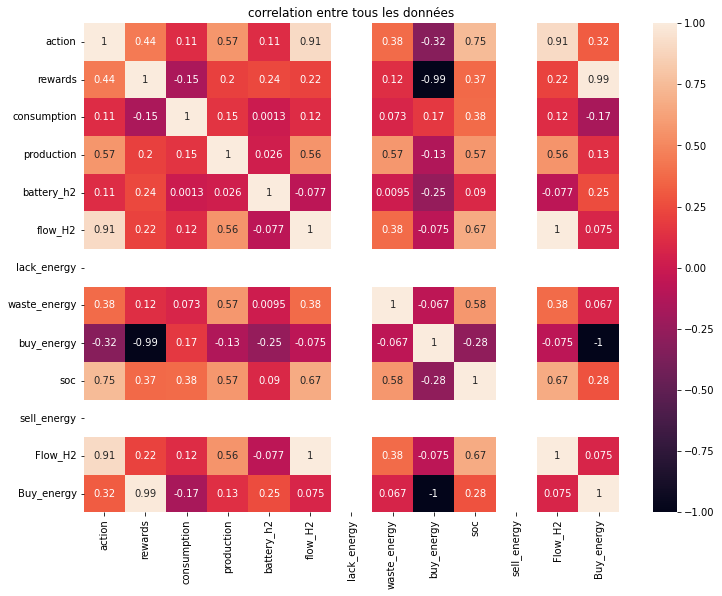

reward -1002.7304319250056


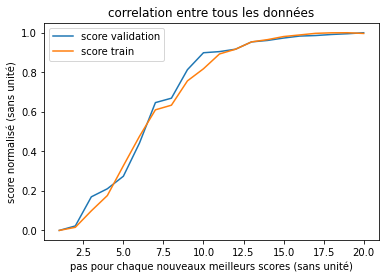

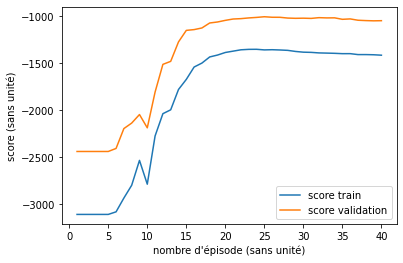

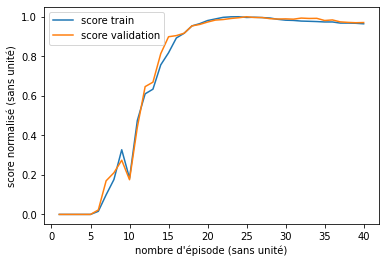

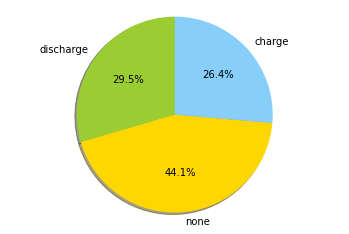

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3079.240213, -2932.544981, -2796.726815, -2531.730413, -2785.016993, -2271.63712, -2034.591563, -1993.304937, -1777.05046, -1669.638337, -1537.998826, -1495.990741, -1430.579983, -1410.496746, -1383.10936, -1368.835543, -1354.566643, -1349.901969, -1349.240036, -1355.583448, -1353.664522, -1356.51631, -1360.527196, -1372.180562, -1379.81211, -1381.981497, -1387.725339, -1389.771039, -1392.069726, -1395.710665, -1395.551949, -1405.564526, -1405.511403, -1407.359228, -1411.9941], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2404.458051698173, -2193.052109599579, -2134.6670937036106, -2043.709279567891, -2185.0484759323153, -1804.454168182303, -1509.6100847738926, -1477.5201642281318, -1270.6484231042414, -1147.8100339949597, -1139.6012709223796, -1122.229934924202, -1069.0931540065576, -1058.554244668143, -1041.211

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-09-57-44_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-09-57-44_score:-2405.8790926354777
train score:-3075.91837
new best best13_05_2022-09-57-44_score:-2193.052109599579
train score:-2932.828982
new best best13_05_2022-09-57-44_score:-2130.7449019876585
train score:-2763.97109
new best best13_05_2022-09-57-44_score:-2036.864277900153
train score:-2517.620317
new best best13_05_2022-09-57-44_score:-1778.430334713492
train score:-2264.72836
new best best13_05_2022-09-57-44_score:-1503.156287388796
train score:-2041.80978
new best best13_05_2022-09-57-44_score:-1468.2073477870726
train score:-1971.695877
new best best13_05_2022-09-57-44_score:-1255.3442608552723
train score:-1765.25789
new best best13_05_2022-09-57-44_score:-1148.6749945611227
train score:-1678.217518
new best best13_05_2022-09-57-44_score:-1139.5571585979778
train score:-1531.39394
new best best13_05_2022-09-57-44_score:-1129.9706765123774
train score:-1497.354332
new 

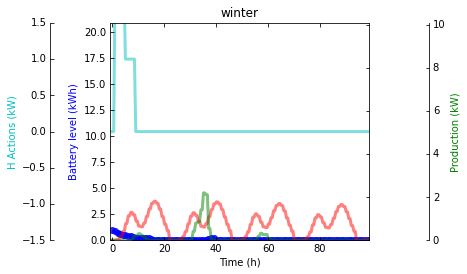

In this plot, total score5.17


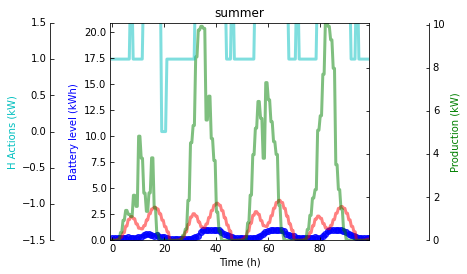

In this plot, total score-15.15368184313957


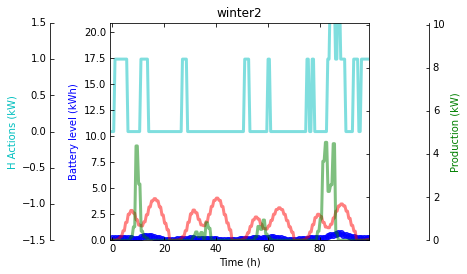

<Figure size 432x288 with 0 Axes>

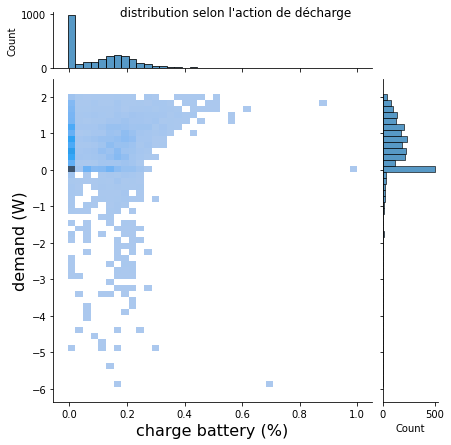

<Figure size 432x288 with 0 Axes>

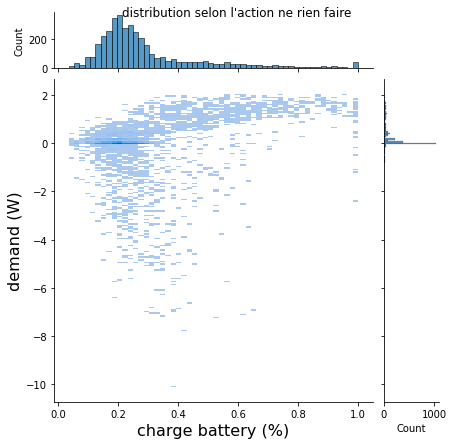

<Figure size 432x288 with 0 Axes>

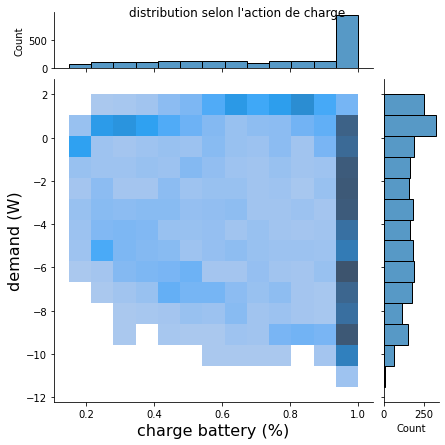

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

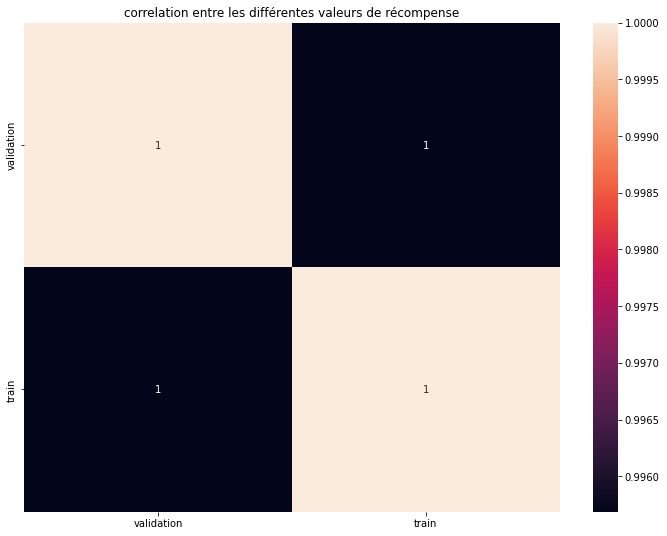

<Figure size 432x288 with 0 Axes>

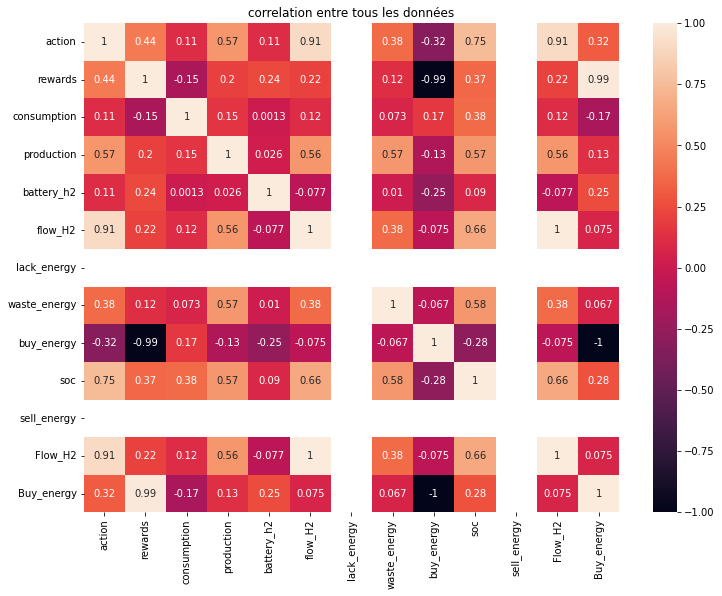

reward -999.6710198723541


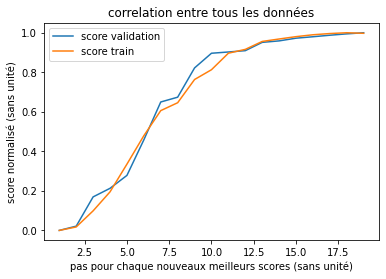

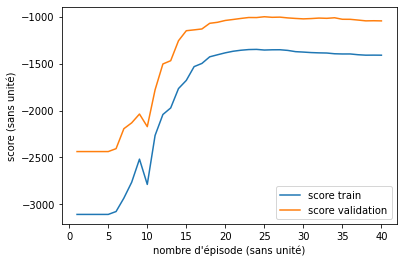

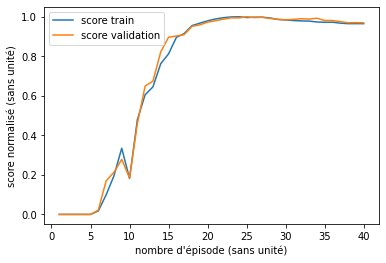

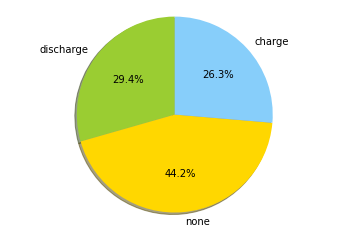

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3075.91837, -2932.828982, -2763.97109, -2517.620317, -2786.930017, -2264.72836, -2041.80978, -1971.695877, -1765.25789, -1678.217518, -1531.39394, -1497.354332, -1426.799969, -1405.08698, -1384.192225, -1367.49799, -1356.625099, -1349.491858, -1347.698458, -1354.48657, -1351.955043, -1351.462137, -1358.477427, -1371.809193, -1376.310667, -1381.663179, -1384.647148, -1386.348198, -1394.254682, -1396.509097, -1396.338938, -1404.5028, -1409.346565, -1408.822743, -1409.489215], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2405.8790926354777, -2193.052109599579, -2130.7449019876585, -2036.864277900153, -2171.13443108699, -1778.430334713492, -1503.156287388796, -1468.2073477870726, -1255.3442608552723, -1148.6749945611227, -1139.5571585979778, -1129.9706765123774, -1069.5942010962535, -1058.8848299318124, -1039.2172285

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-10-11-37_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-10-11-37_score:-2404.842911148211
train score:-3073.259643
new best best13_05_2022-10-11-37_score:-2193.052109599579
train score:-2932.828982
new best best13_05_2022-10-11-37_score:-2127.649007034357
train score:-2766.755081
new best best13_05_2022-10-11-37_score:-2026.3514045262273
train score:-2508.989908
new best best13_05_2022-10-11-37_score:-1777.1661973858209
train score:-2225.142751
new best best13_05_2022-10-11-37_score:-1466.7410933954088
train score:-2007.553183
new best best13_05_2022-10-11-37_score:-1452.397049150517
train score:-1963.039034
new best best13_05_2022-10-11-37_score:-1238.7601208767883
train score:-1749.60662
new best best13_05_2022-10-11-37_score:-1138.3962977923366
train score:-1667.599615
new best best13_05_2022-10-11-37_score:-1135.8971875765492
train score:-1490.822097
new best best13_05_2022-10-11-37_score:-1070.0444005661775
train score:-1422.556701

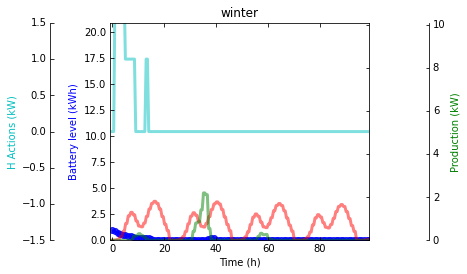

In this plot, total score5.28


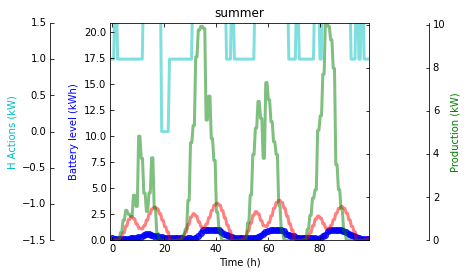

In this plot, total score-15.15368184313957


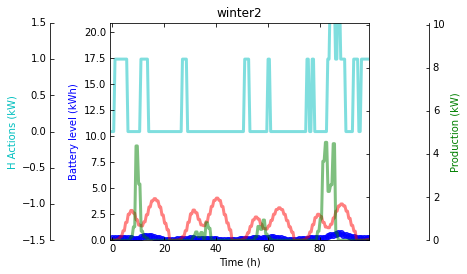

<Figure size 432x288 with 0 Axes>

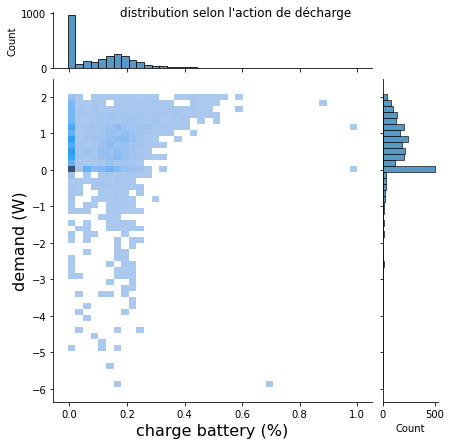

<Figure size 432x288 with 0 Axes>

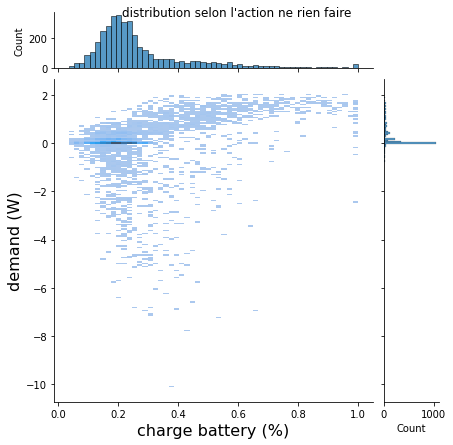

<Figure size 432x288 with 0 Axes>

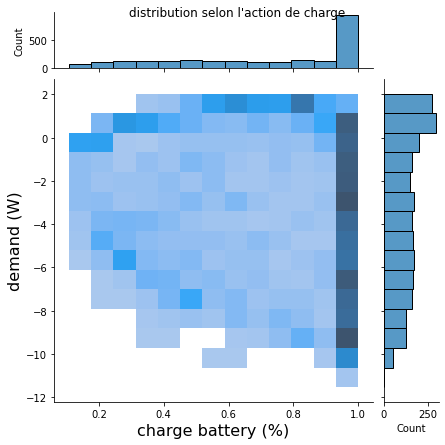

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

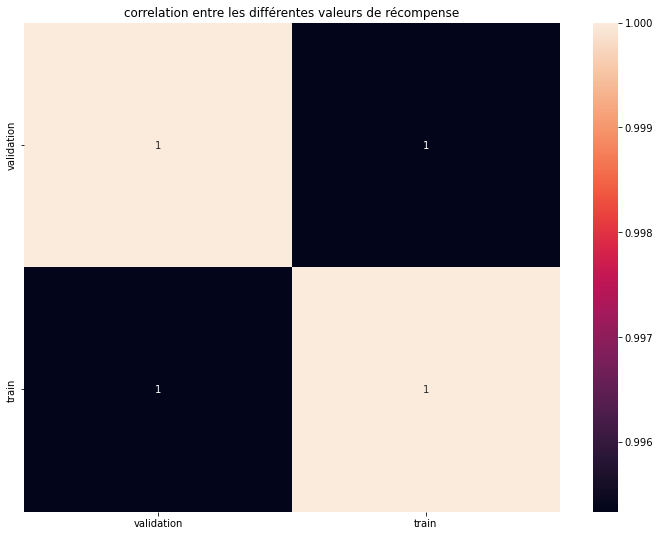

<Figure size 432x288 with 0 Axes>

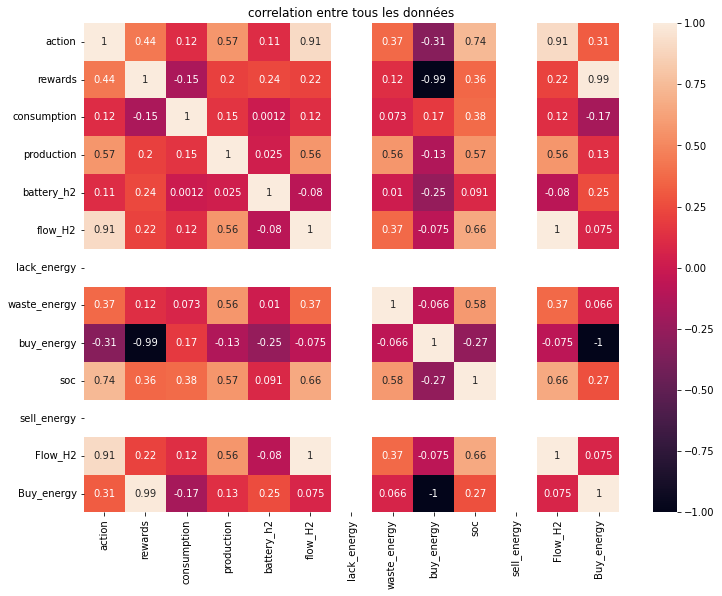

reward -993.5766167944186


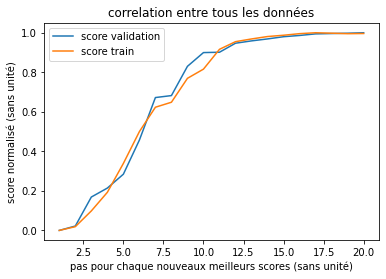

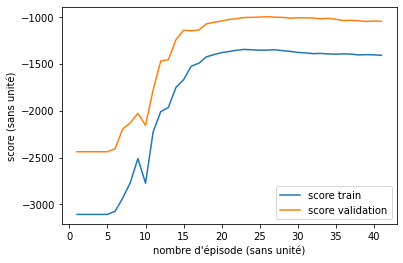

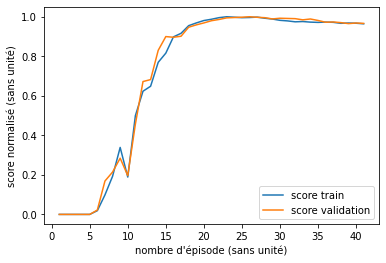

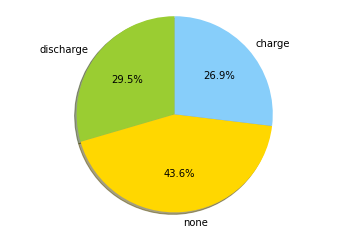

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3073.259643, -2932.828982, -2766.755081, -2508.989908, -2773.401964, -2225.142751, -2007.553183, -1963.039034, -1749.60662, -1667.599615, -1522.586732, -1490.822097, -1422.556701, -1398.379185, -1376.745262, -1365.291003, -1351.061842, -1342.944525, -1347.005283, -1351.331949, -1349.758221, -1346.424978, -1356.167969, -1363.483379, -1374.939084, -1380.1011, -1388.178909, -1385.704608, -1390.997991, -1393.316789, -1390.742953, -1392.762627, -1401.624043, -1398.79858, -1400.826552, -1405.851742], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2404.842911148211, -2193.052109599579, -2127.649007034357, -2026.3514045262273, -2153.14863025448, -1777.1661973858209, -1466.7410933954088, -1452.397049150517, -1238.7601208767883, -1138.3962977923366, -1143.4548652574886, -1135.8971875765492, -1070.0444005661775, -1053.0255613

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-10-25-52_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-10-25-52_score:-2405.775366412243
train score:-3076.496664
new best best13_05_2022-10-25-52_score:-2193.052109599579
train score:-2933.124983
new best best13_05_2022-10-25-52_score:-2128.9911140906115
train score:-2764.21765
new best best13_05_2022-10-25-52_score:-2012.5569165803172
train score:-2490.014568
new best best13_05_2022-10-25-52_score:-1771.5080275649161
train score:-2222.031924
new best best13_05_2022-10-25-52_score:-1469.70142662352
train score:-2013.21105
new best best13_05_2022-10-25-52_score:-1448.1844708687568
train score:-1954.715072
new best best13_05_2022-10-25-52_score:-1214.5808950757637
train score:-1737.680259
new best best13_05_2022-10-25-52_score:-1141.7821883805009
train score:-1675.250836
new best best13_05_2022-10-25-52_score:-1135.306393490093
train score:-1486.0576
new best best13_05_2022-10-25-52_score:-1076.4361639105846
train score:-1425.458884
new

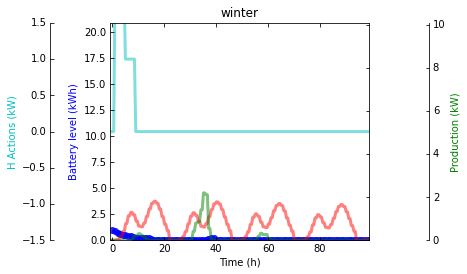

In this plot, total score5.17


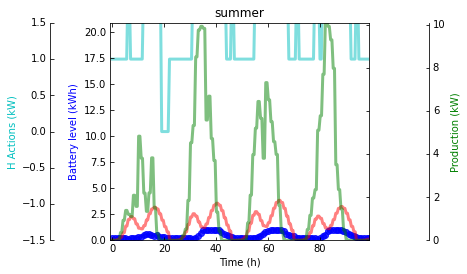

In this plot, total score-15.153681843139571


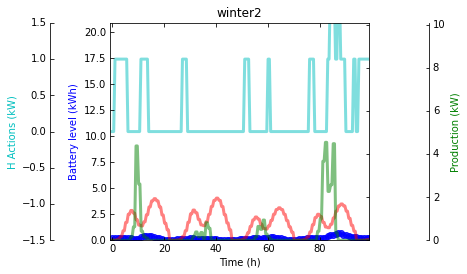

<Figure size 432x288 with 0 Axes>

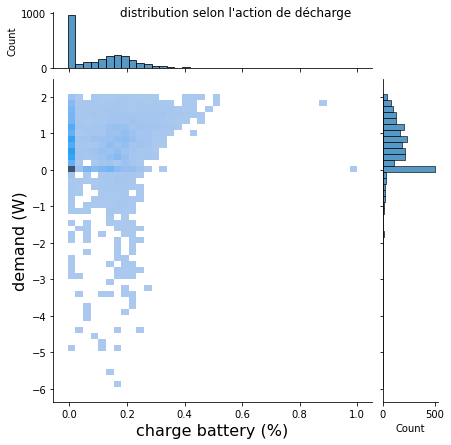

<Figure size 432x288 with 0 Axes>

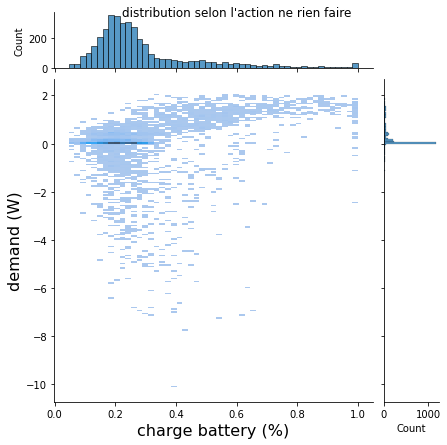

<Figure size 432x288 with 0 Axes>

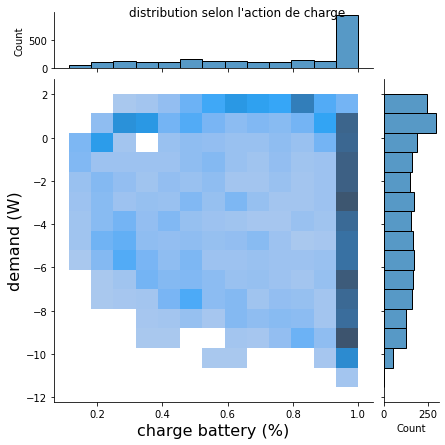

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

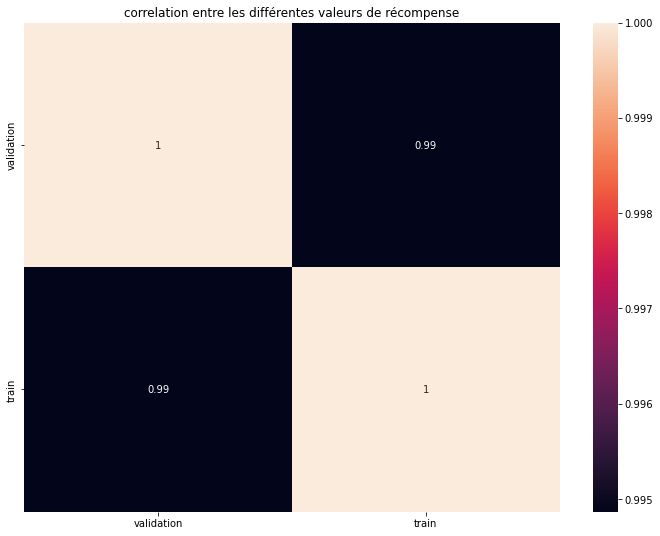

<Figure size 432x288 with 0 Axes>

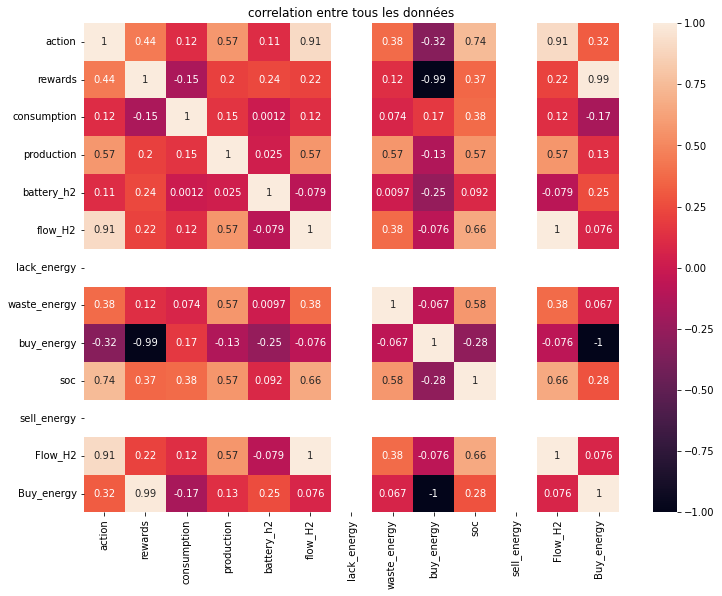

reward -989.8524018131076


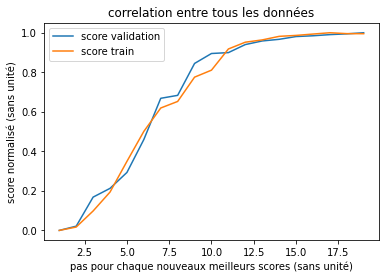

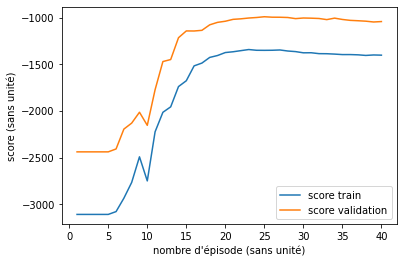

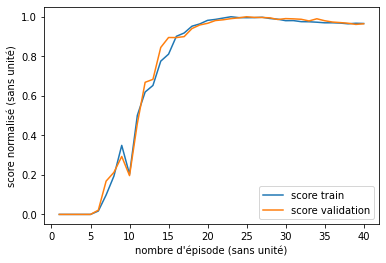

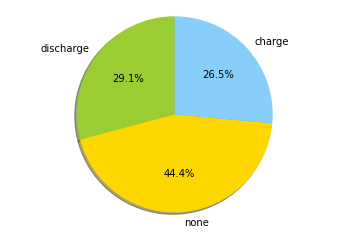

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3076.496664, -2933.124983, -2764.21765, -2490.014568, -2747.884267, -2222.031924, -2013.21105, -1954.715072, -1737.680259, -1675.250836, -1515.934873, -1486.0576, -1425.458884, -1405.087696, -1373.277809, -1364.853702, -1352.791844, -1341.017206, -1348.95354, -1349.54016, -1348.776022, -1345.704631, -1356.845469, -1363.13144, -1376.107136, -1375.440335, -1385.044429, -1385.846005, -1389.885018, -1395.074225, -1394.987898, -1397.641886, -1404.112426, -1399.15689, -1401.27696], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2405.775366412243, -2193.052109599579, -2128.9911140906115, -2012.5569165803172, -2152.7363632144406, -1771.5080275649161, -1469.70142662352, -1448.1844708687568, -1214.5808950757637, -1141.7821883805009, -1142.4321608201135, -1135.306393490093, -1076.4361639105846, -1050.014927440243, -1038.01846

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-10-40-02_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-10-40-02_score:-2407.342013837537
train score:-3078.866214
new best best13_05_2022-10-40-02_score:-2193.353975654114
train score:-2933.67355
new best best13_05_2022-10-40-02_score:-2124.880687811332
train score:-2761.136252
new best best13_05_2022-10-40-02_score:-2000.3031618788518
train score:-2476.027106
new best best13_05_2022-10-40-02_score:-1783.3853187512577
train score:-2224.886085
new best best13_05_2022-10-40-02_score:-1467.2198564243881
train score:-2013.743304
new best best13_05_2022-10-40-02_score:-1443.4879146912353
train score:-1940.932394
new best best13_05_2022-10-40-02_score:-1202.6175596212997
train score:-1723.87562
new best best13_05_2022-10-40-02_score:-1143.5928060658189
train score:-1680.041074
new best best13_05_2022-10-40-02_score:-1143.3317389443982
train score:-1513.58309
new best best13_05_2022-10-40-02_score:-1131.2062751510312
train score:-1485.705367


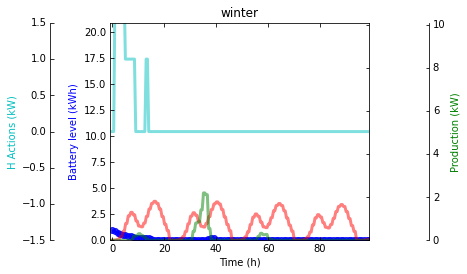

In this plot, total score5.390000000000001


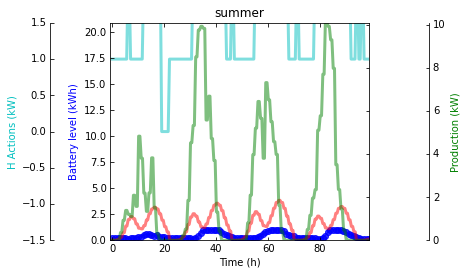

In this plot, total score-15.47865141717391


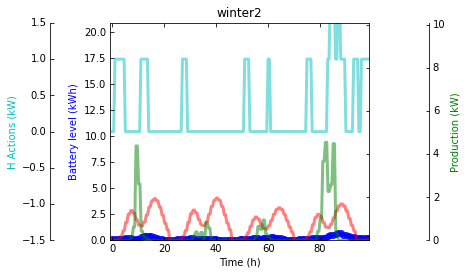

<Figure size 432x288 with 0 Axes>

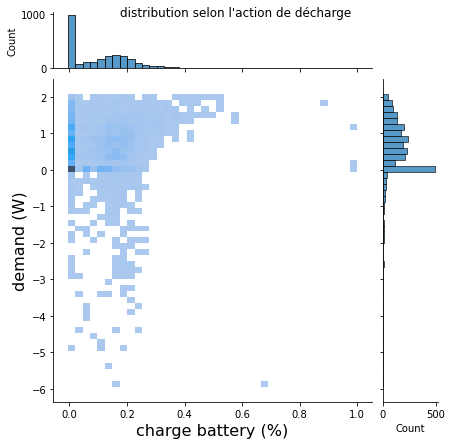

<Figure size 432x288 with 0 Axes>

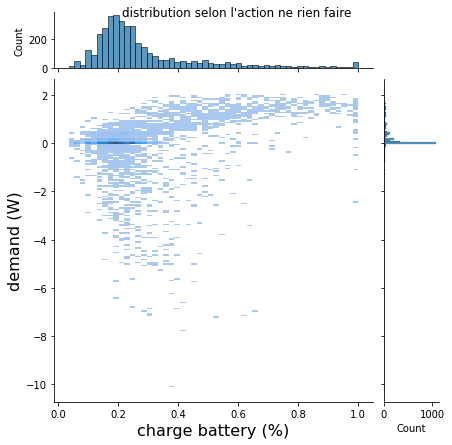

<Figure size 432x288 with 0 Axes>

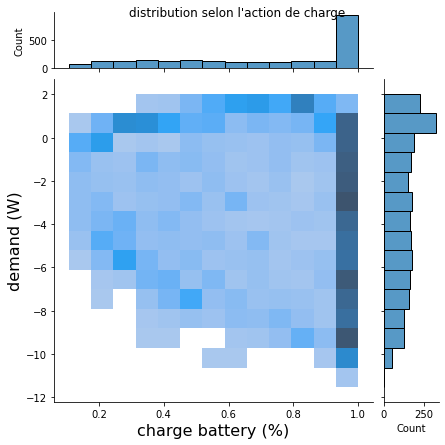

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

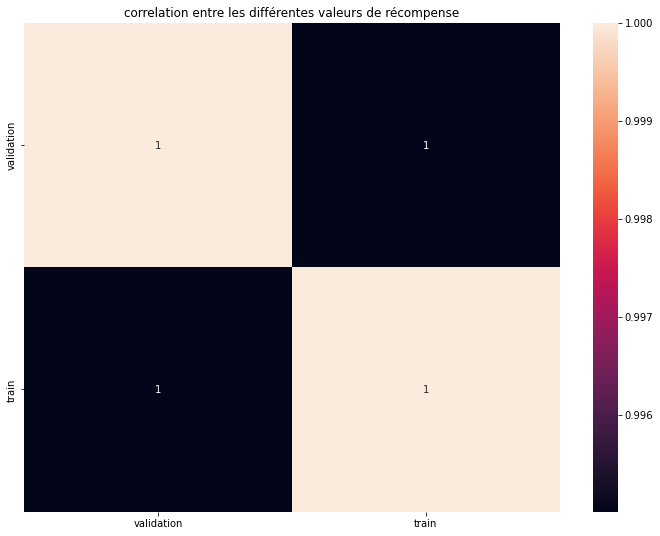

<Figure size 432x288 with 0 Axes>

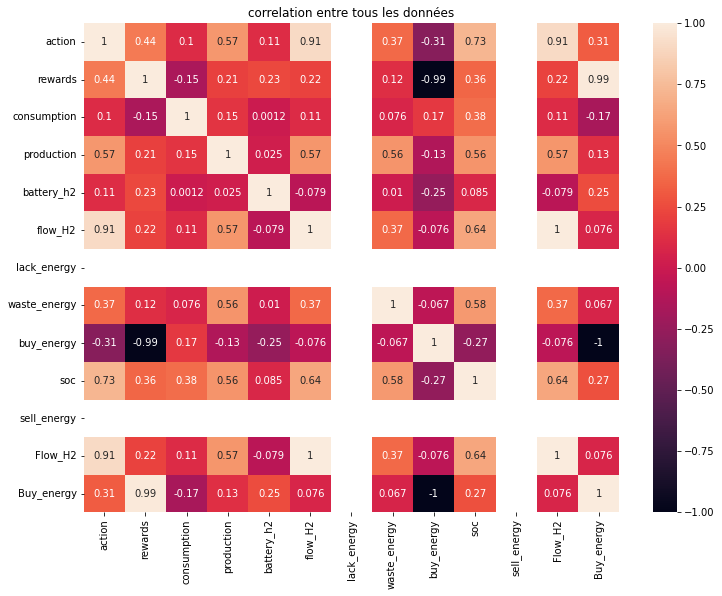

reward -991.5232243100946


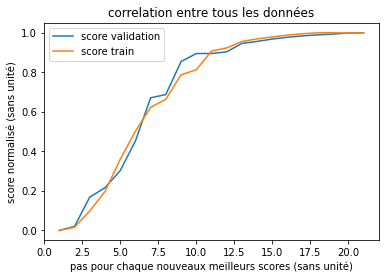

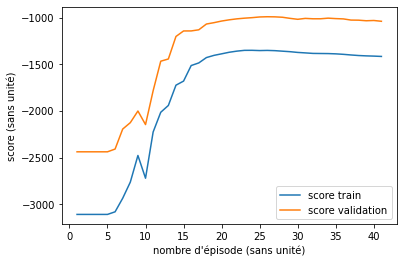

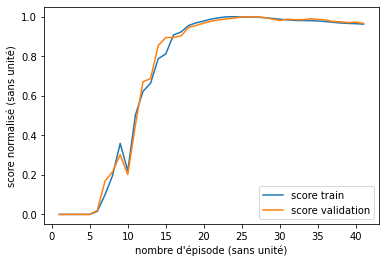

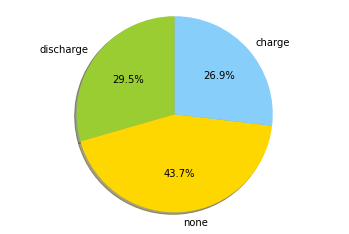

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.866214, -2933.67355, -2761.136252, -2476.027106, -2719.371773, -2224.886085, -2013.743304, -1940.932394, -1723.87562, -1680.041074, -1513.58309, -1485.705367, -1428.513736, -1404.80925, -1388.369392, -1371.537008, -1359.513165, -1351.131994, -1350.787521, -1353.477456, -1351.758058, -1354.393527, -1359.972842, -1365.453451, -1373.373559, -1378.376131, -1383.852223, -1384.83058, -1385.703564, -1388.602138, -1393.735456, -1400.580741, -1406.472829, -1410.192902, -1412.747197, -1416.233857], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2407.342013837537, -2193.353975654114, -2124.880687811332, -2000.3031618788518, -2145.3918713452294, -1783.3853187512577, -1467.2198564243881, -1443.4879146912353, -1202.6175596212997, -1143.5928060658189, -1143.3317389443982, -1131.2062751510312, -1069.5316758536865, -1054.83529

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-10-56-24_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-10-56-24_score:-2408.385563136777
train score:-3080.544859
new best best13_05_2022-10-56-24_score:-2193.353975654114
train score:-2933.67355
new best best13_05_2022-10-56-24_score:-2127.2863358402756
train score:-2762.957063
new best best13_05_2022-10-56-24_score:-1975.4298076388586
train score:-2454.088735
new best best13_05_2022-10-56-24_score:-1798.4133239802613
train score:-2260.275543
new best best13_05_2022-10-56-24_score:-1485.947455478963
train score:-2028.357444
new best best13_05_2022-10-56-24_score:-1447.4412793881202
train score:-1955.359994
new best best13_05_2022-10-56-24_score:-1210.7815156077995
train score:-1734.758395
new best best13_05_2022-10-56-24_score:-1154.5911101050588
train score:-1693.392888
new best best13_05_2022-10-56-24_score:-1138.8942950621713
train score:-1535.177364
new best best13_05_2022-10-56-24_score:-1077.2586716831793
train score:-1432.37047

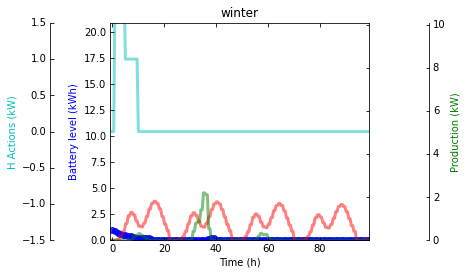

In this plot, total score5.390000000000001


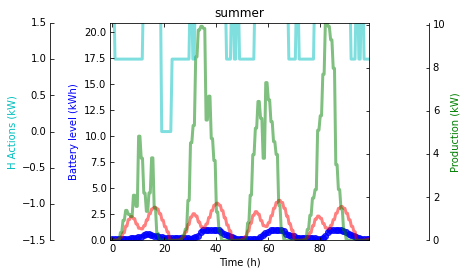

In this plot, total score-16.208888590574478


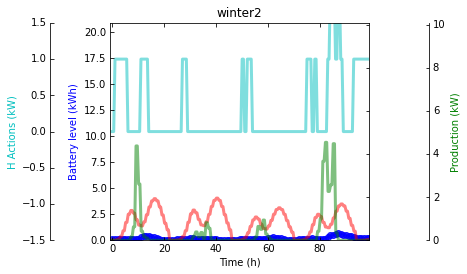

<Figure size 432x288 with 0 Axes>

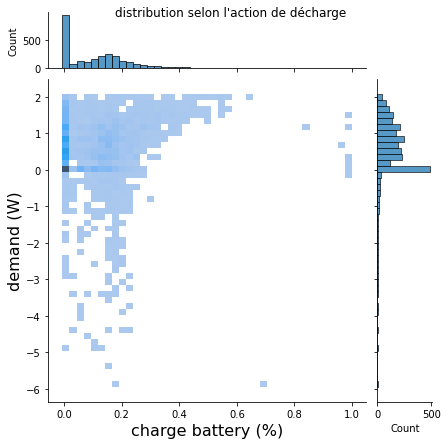

<Figure size 432x288 with 0 Axes>

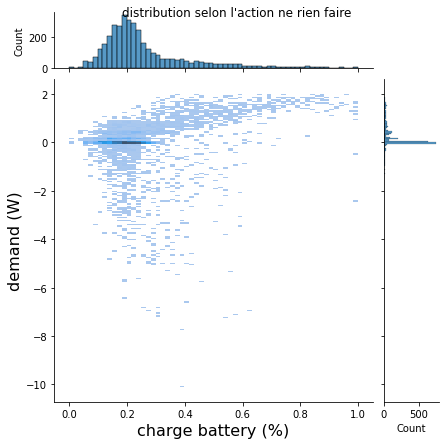

<Figure size 432x288 with 0 Axes>

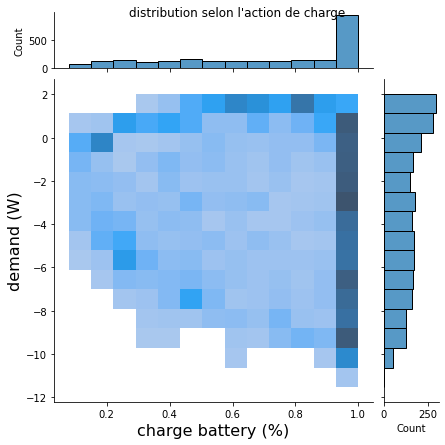

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

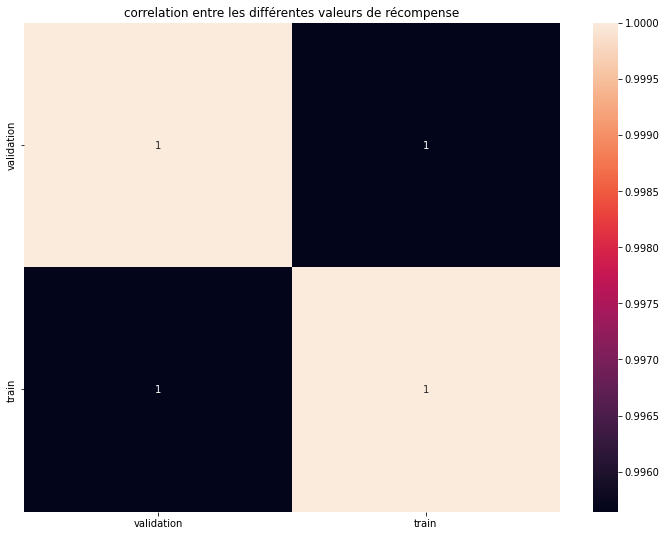

<Figure size 432x288 with 0 Axes>

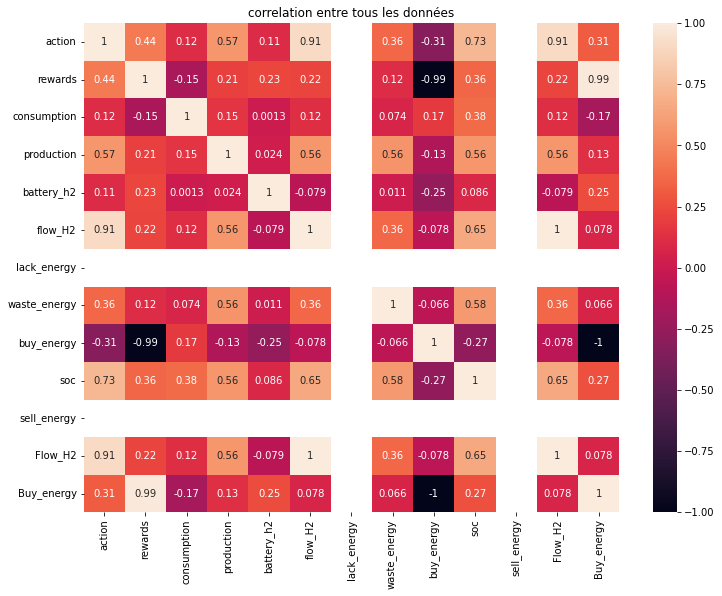

reward -991.3778349235212


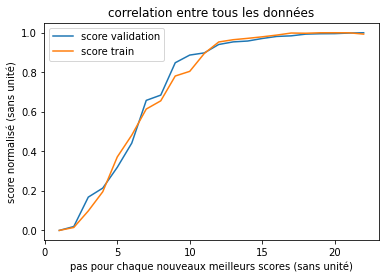

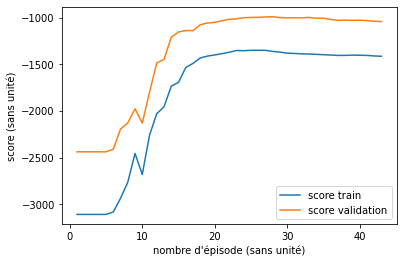

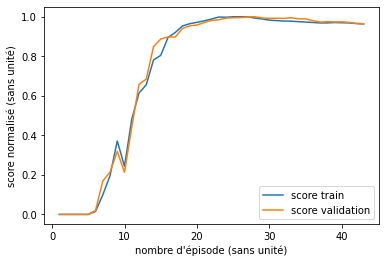

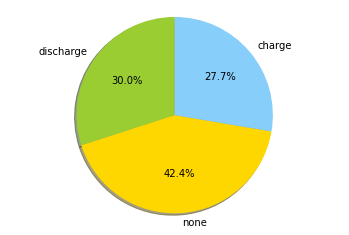

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3080.544859, -2933.67355, -2762.957063, -2454.088735, -2679.29522, -2260.275543, -2028.357444, -1955.359994, -1734.758395, -1693.392888, -1535.177364, -1490.403274, -1432.370472, -1412.217111, -1400.082369, -1386.53062, -1371.171511, -1352.870679, -1354.837922, -1350.528696, -1350.327791, -1350.856402, -1362.465177, -1370.048413, -1381.059372, -1384.456085, -1388.580773, -1390.004899, -1393.816954, -1397.424152, -1401.326965, -1405.461145, -1405.042303, -1401.970682, -1403.52914, -1405.198977, -1410.865889, -1414.239956], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2408.385563136777, -2193.353975654114, -2127.2863358402756, -1975.4298076388586, -2129.3957488732412, -1798.4133239802613, -1485.947455478963, -1447.4412793881202, -1210.7815156077995, -1154.5911101050588, -1138.8942950621713, -1139.7141331373132, -10

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-11-13-44_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-11-13-44_score:-2408.385563136777
train score:-3080.544859
new best best13_05_2022-11-13-44_score:-2194.736691654194
train score:-2933.67355
new best best13_05_2022-11-13-44_score:-2128.5501110697296
train score:-2762.957063
new best best13_05_2022-11-13-44_score:-1959.5517114159811
train score:-2440.167914
new best best13_05_2022-11-13-44_score:-1789.1277839955583
train score:-2258.36277
new best best13_05_2022-11-13-44_score:-1501.0970101523344
train score:-2041.796087
new best best13_05_2022-11-13-44_score:-1444.5638148286598
train score:-1956.063277
new best best13_05_2022-11-13-44_score:-1208.980604434575
train score:-1741.145817
new best best13_05_2022-11-13-44_score:-1159.3907290793868
train score:-1696.512984
new best best13_05_2022-11-13-44_score:-1138.3963966027368
train score:-1535.026165
new best best13_05_2022-11-13-44_score:-1136.7468456862844
train score:-1496.56991


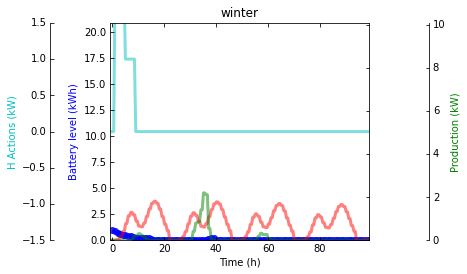

In this plot, total score5.28


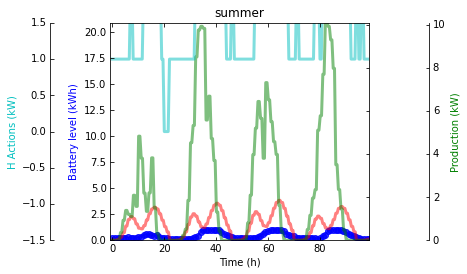

In this plot, total score-15.26368184313957


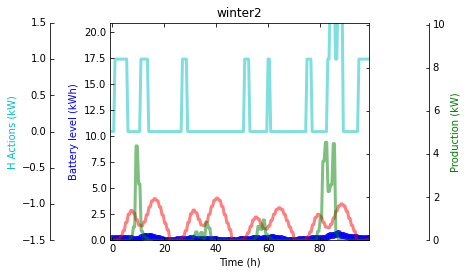

<Figure size 432x288 with 0 Axes>

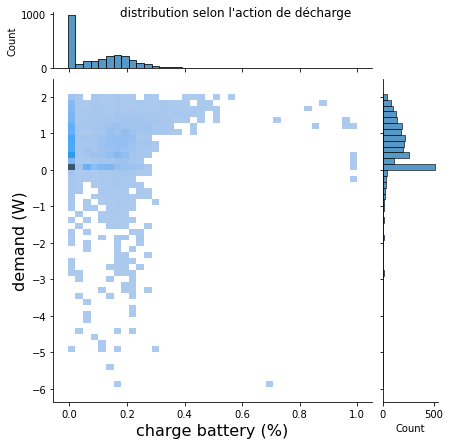

<Figure size 432x288 with 0 Axes>

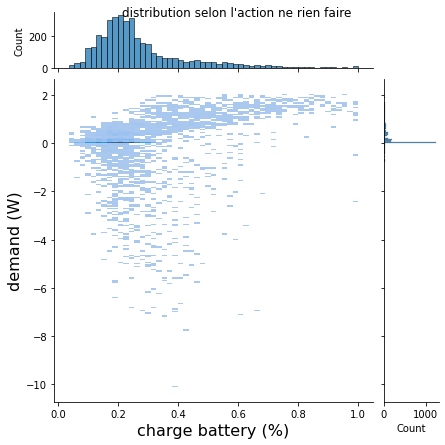

<Figure size 432x288 with 0 Axes>

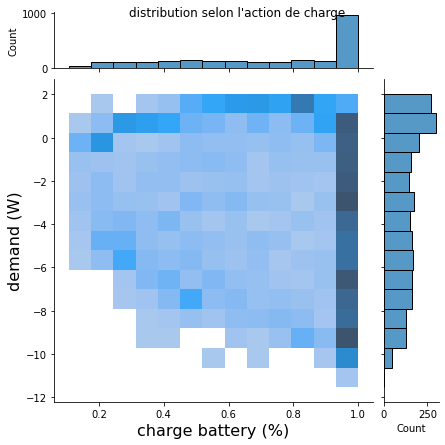

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

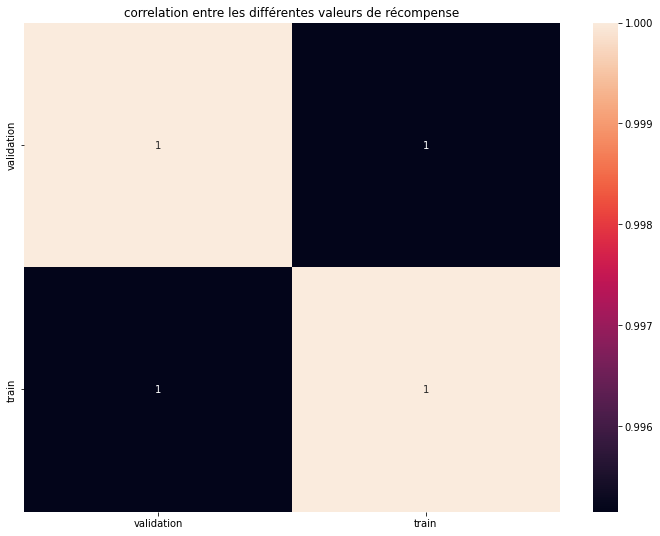

<Figure size 432x288 with 0 Axes>

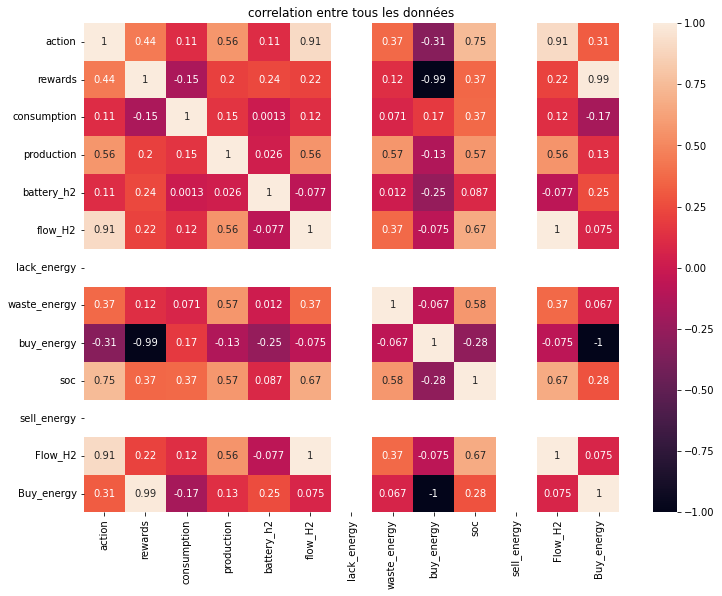

reward -998.0586122196665


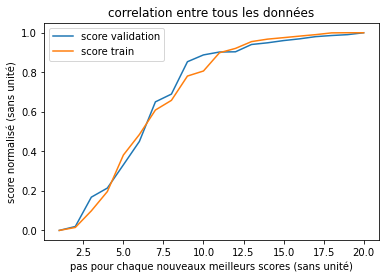

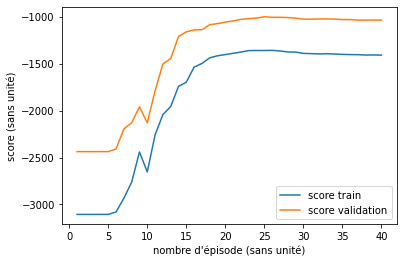

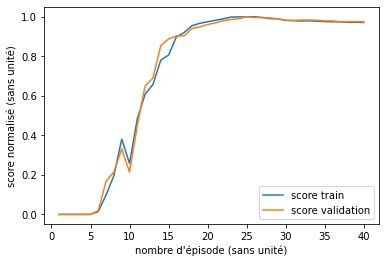

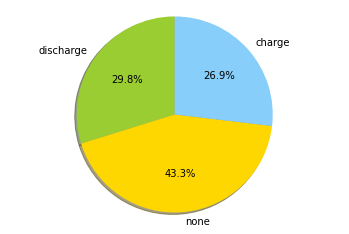

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3080.544859, -2933.67355, -2762.957063, -2440.167914, -2654.22581, -2258.36277, -2041.796087, -1956.063277, -1741.145817, -1696.512984, -1535.026165, -1496.56991, -1436.447491, -1414.652983, -1401.52547, -1387.928531, -1374.974231, -1359.259485, -1358.080893, -1358.359327, -1356.656833, -1362.875752, -1373.910584, -1375.12, -1388.982156, -1391.55471, -1394.717175, -1392.490934, -1395.683887, -1399.590967, -1401.764959, -1402.551384, -1406.729689, -1405.698982, -1407.184782], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2408.385563136777, -2194.736691654194, -2128.5501110697296, -1959.5517114159811, -2128.5444662822847, -1789.1277839955583, -1501.0970101523344, -1444.5638148286598, -1208.980604434575, -1159.3907290793868, -1138.3963966027368, -1136.7468456862844, -1083.5204945257283, -1071.2787648154772, -1055.090

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-11-27-40_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-11-27-40_score:-2408.385563136777
train score:-3079.635261
new best best13_05_2022-11-27-40_score:-2194.736691654194
train score:-2933.969062
new best best13_05_2022-11-27-40_score:-2130.027236118367
train score:-2763.90118
new best best13_05_2022-11-27-40_score:-1952.9715822495418
train score:-2438.435515
new best best13_05_2022-11-27-40_score:-1788.8975794878497
train score:-2259.476419
new best best13_05_2022-11-27-40_score:-1506.0543359088842
train score:-2042.380524
new best best13_05_2022-11-27-40_score:-1451.6167167044186
train score:-1956.494903
new best best13_05_2022-11-27-40_score:-1206.1115972792759
train score:-1744.209967
new best best13_05_2022-11-27-40_score:-1158.8405289001676
train score:-1689.156761
new best best13_05_2022-11-27-40_score:-1142.1861039653886
train score:-1532.911421
new best best13_05_2022-11-27-40_score:-1137.620123454777
train score:-1505.094516

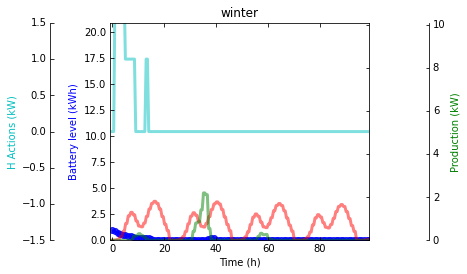

In this plot, total score5.390000000000001


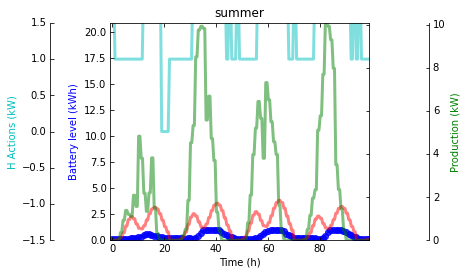

In this plot, total score-17.767555444396045


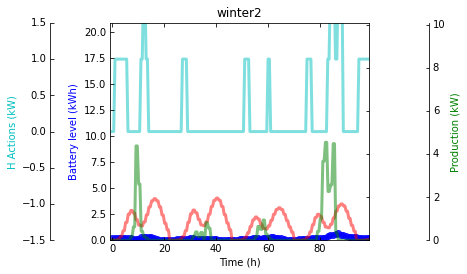

<Figure size 432x288 with 0 Axes>

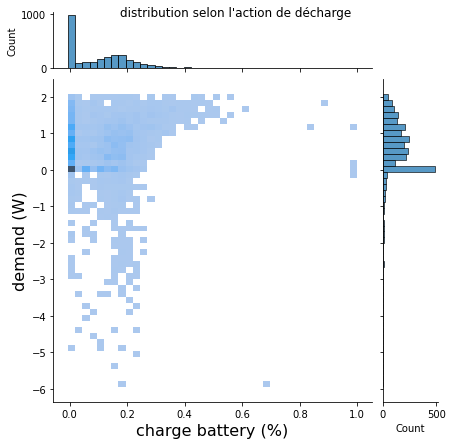

<Figure size 432x288 with 0 Axes>

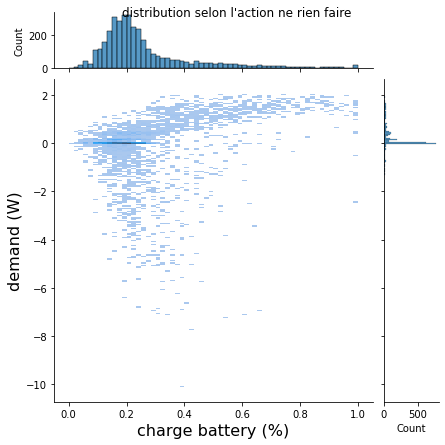

<Figure size 432x288 with 0 Axes>

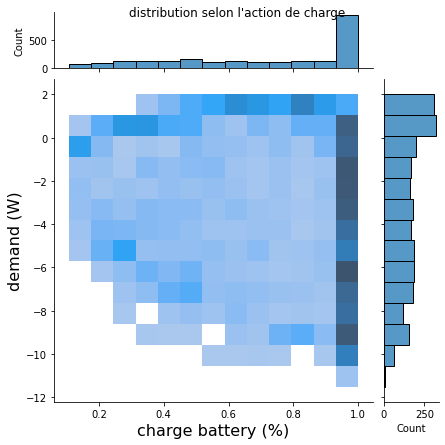

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

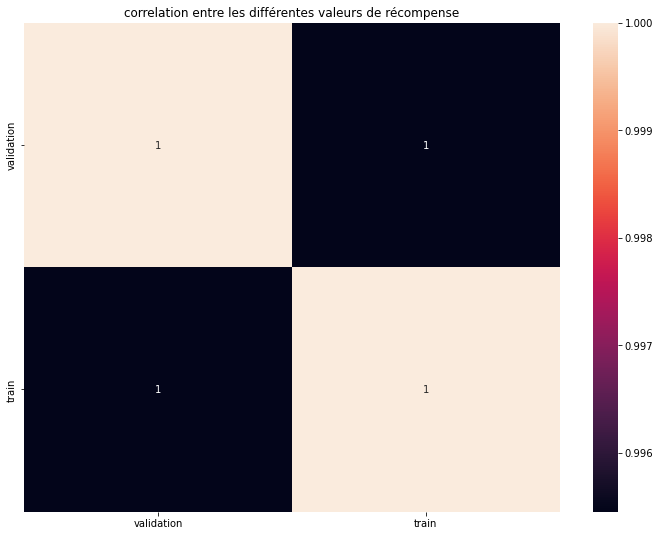

<Figure size 432x288 with 0 Axes>

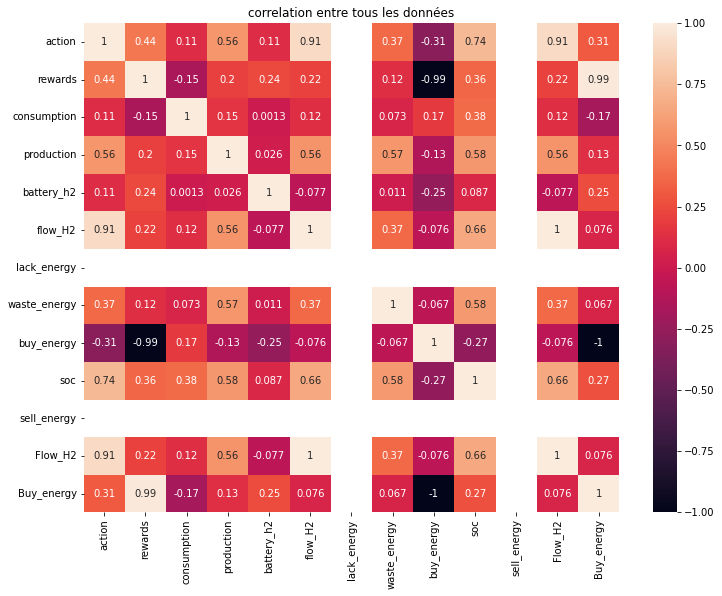

reward -1008.3664688332791


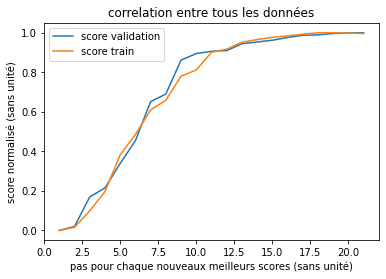

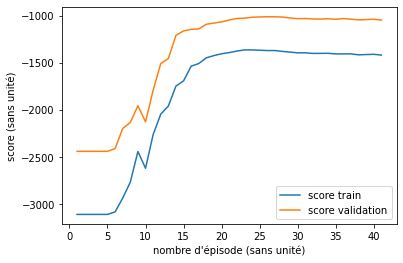

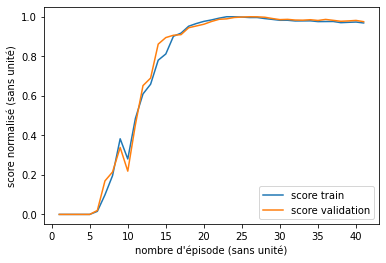

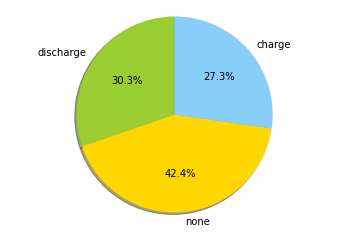

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3079.635261, -2933.969062, -2763.90118, -2438.435515, -2616.996313, -2259.476419, -2042.380524, -1956.494903, -1744.209967, -1689.156761, -1532.911421, -1505.094516, -1444.044574, -1420.619398, -1401.268398, -1388.595002, -1372.994735, -1360.38007, -1360.816812, -1363.341934, -1367.360629, -1367.09869, -1376.459558, -1383.694933, -1391.704346, -1391.388977, -1397.662382, -1397.191631, -1396.51621, -1403.283103, -1402.661365, -1402.211877, -1412.684535, -1409.669715, -1407.088247, -1415.329917], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2408.385563136777, -2194.736691654194, -2130.027236118367, -1952.9715822495418, -2124.095346508868, -1788.8975794878497, -1506.0543359088842, -1451.6167167044186, -1206.1115972792759, -1158.8405289001676, -1142.1861039653886, -1137.620123454777, -1087.8890425911522, -1075.173639

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-11-42-08_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-11-42-08_score:-2409.1943556086626
train score:-3079.635261
new best best13_05_2022-11-42-08_score:-2194.736691654194
train score:-2933.969062
new best best13_05_2022-11-42-08_score:-2130.027236118367
train score:-2765.262077
new best best13_05_2022-11-42-08_score:-1952.9715822495418
train score:-2425.962783
new best best13_05_2022-11-42-08_score:-1797.6368649420037
train score:-2256.045785
new best best13_05_2022-11-42-08_score:-1509.9597002434675
train score:-2045.587858
new best best13_05_2022-11-42-08_score:-1444.9584533074158
train score:-1947.84353
new best best13_05_2022-11-42-08_score:-1212.320637861456
train score:-1746.913276
new best best13_05_2022-11-42-08_score:-1155.4088854513975
train score:-1696.990724
new best best13_05_2022-11-42-08_score:-1142.939773227321
train score:-1542.47191
new best best13_05_2022-11-42-08_score:-1138.2757240919746
train score:-1507.116073


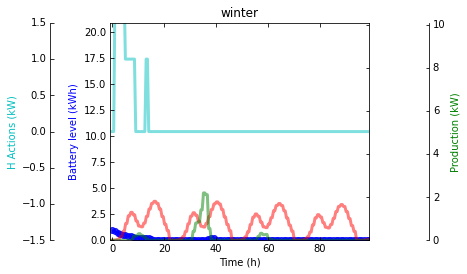

In this plot, total score5.279999999999999


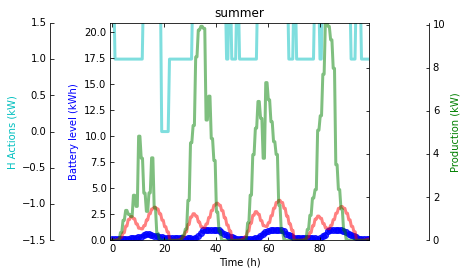

In this plot, total score-16.428888590574477


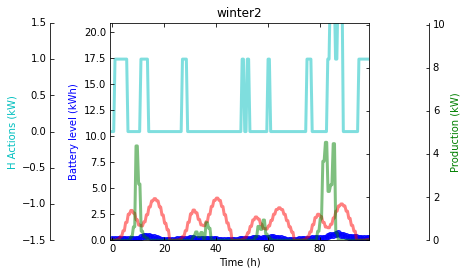

<Figure size 432x288 with 0 Axes>

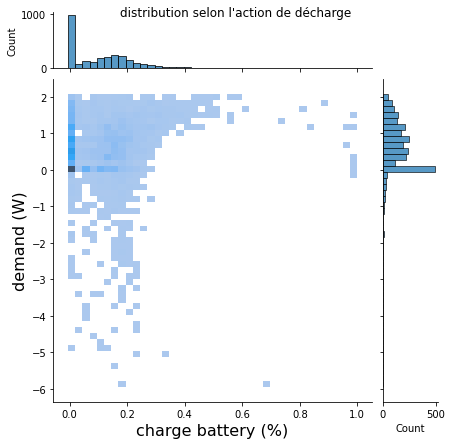

<Figure size 432x288 with 0 Axes>

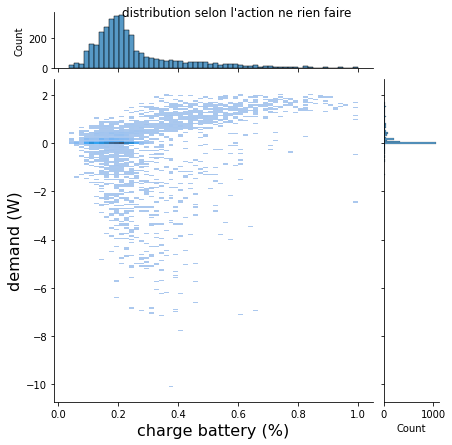

<Figure size 432x288 with 0 Axes>

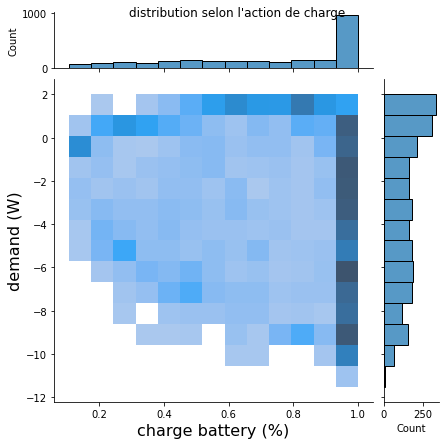

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

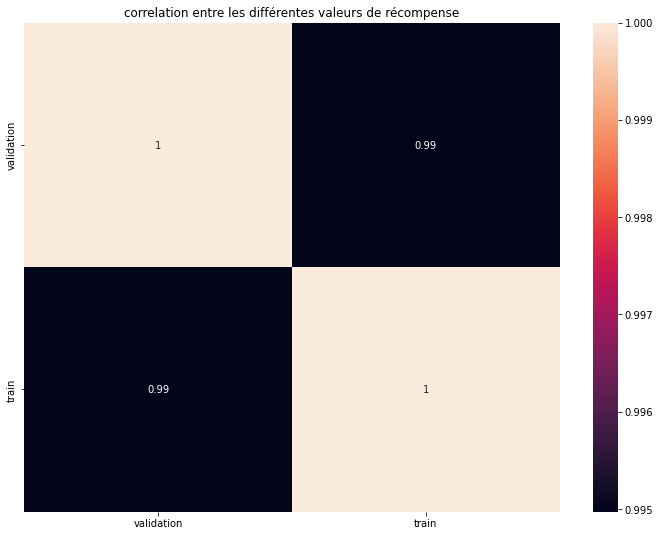

<Figure size 432x288 with 0 Axes>

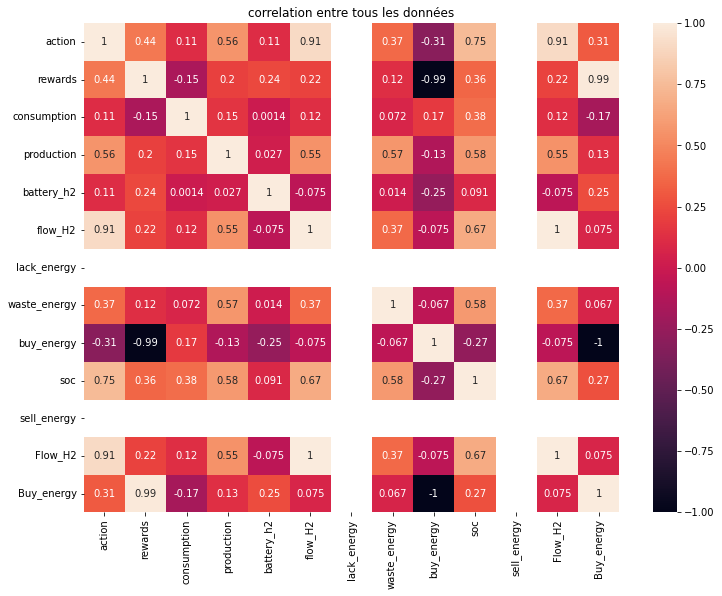

reward -1013.5524179427908


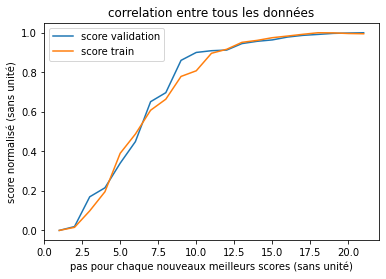

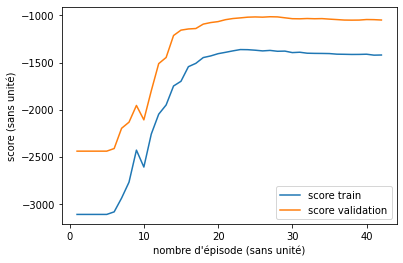

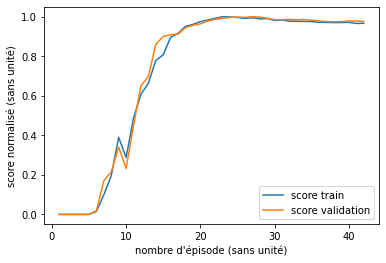

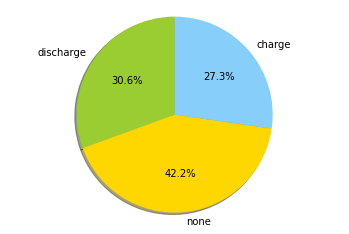

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3079.635261, -2933.969062, -2765.262077, -2425.962783, -2605.156299, -2256.045785, -2045.587858, -1947.84353, -1746.913276, -1696.990724, -1542.47191, -1507.116073, -1445.91848, -1428.564198, -1404.748146, -1390.240023, -1374.866882, -1361.093301, -1362.363237, -1367.837471, -1375.293538, -1370.071241, -1379.142735, -1377.455912, -1393.225151, -1389.303548, -1399.657372, -1401.453141, -1402.154209, -1403.510813, -1409.88273, -1411.169887, -1412.802829, -1412.424963, -1410.286487, -1420.295378, -1418.778996], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2409.1943556086626, -2194.736691654194, -2130.027236118367, -1952.9715822495418, -2105.4399659543706, -1797.6368649420037, -1509.9597002434675, -1444.9584533074158, -1212.320637861456, -1155.4088854513975, -1142.939773227321, -1138.2757240919746, -1091.670531769690

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-11-56-47_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-11-56-47_score:-2411.587655486306
train score:-3078.404314
new best best13_05_2022-11-56-47_score:-2194.736691654194
train score:-2933.969062
new best best13_05_2022-11-56-47_score:-2128.9976994878234
train score:-2772.121851
new best best13_05_2022-11-56-47_score:-1943.64730842485
train score:-2417.5143
new best best13_05_2022-11-56-47_score:-1794.4590870779648
train score:-2258.714973
new best best13_05_2022-11-56-47_score:-1509.9597002434675
train score:-2047.941451
new best best13_05_2022-11-56-47_score:-1444.7307992079513
train score:-1955.048494
new best best13_05_2022-11-56-47_score:-1215.5877723490848
train score:-1742.463017
new best best13_05_2022-11-56-47_score:-1166.570664838102
train score:-1696.438067
new best best13_05_2022-11-56-47_score:-1139.090871508466
train score:-1553.410772
new best best13_05_2022-11-56-47_score:-1095.9920678673661
train score:-1457.006325
ne

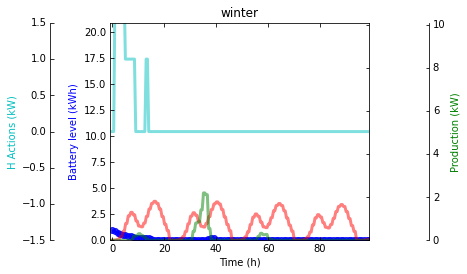

In this plot, total score5.279999999999999


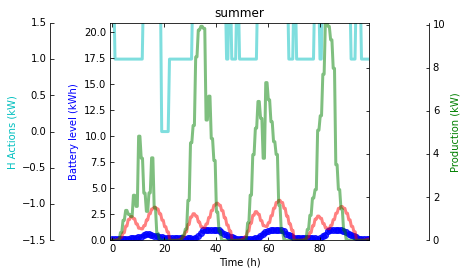

In this plot, total score-16.14160468623274


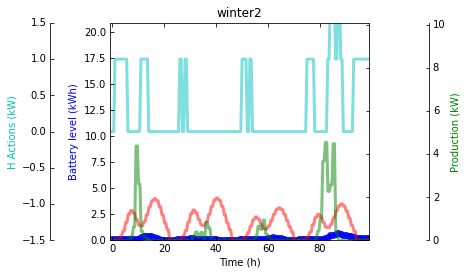

<Figure size 432x288 with 0 Axes>

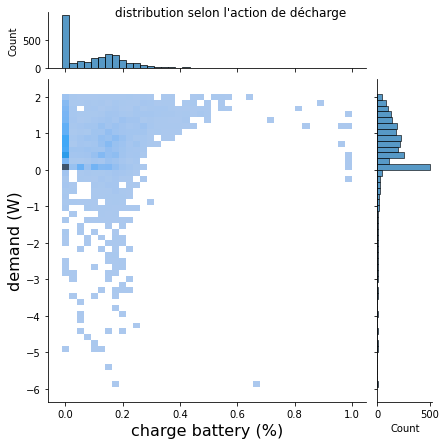

<Figure size 432x288 with 0 Axes>

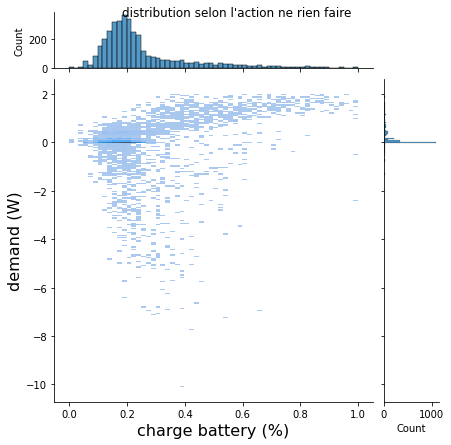

<Figure size 432x288 with 0 Axes>

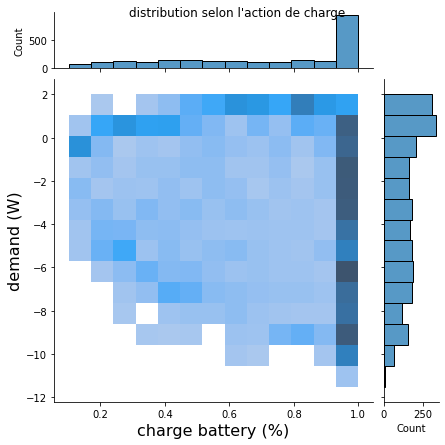

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

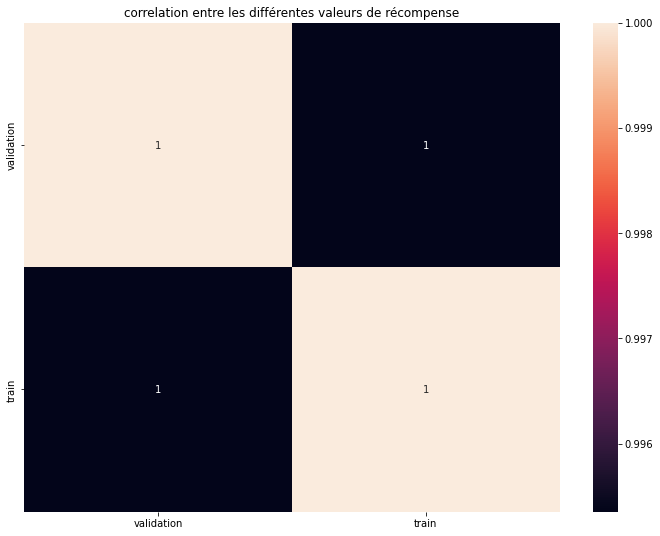

<Figure size 432x288 with 0 Axes>

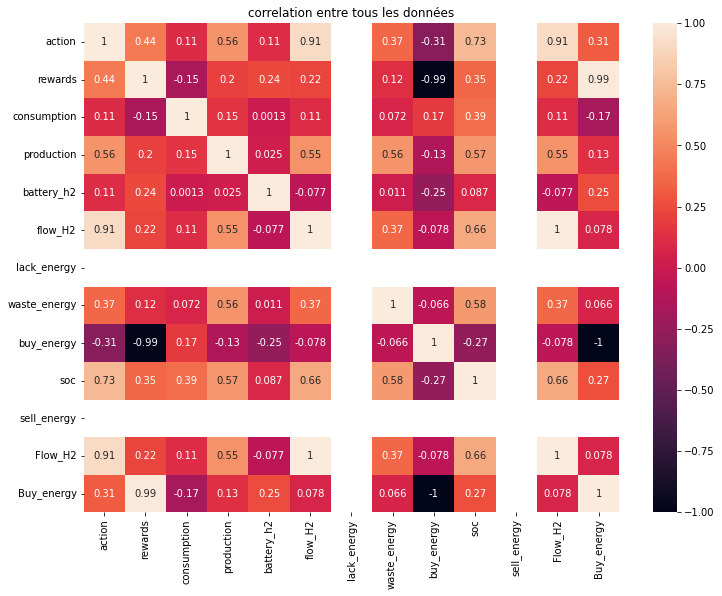

reward -1005.5544184037882


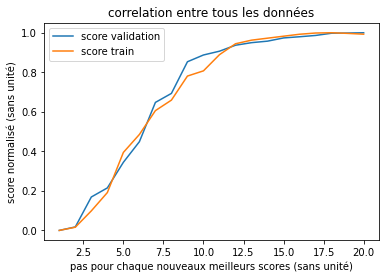

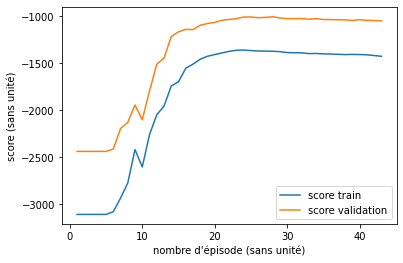

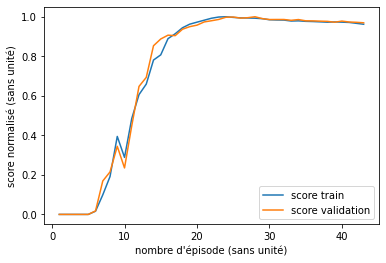

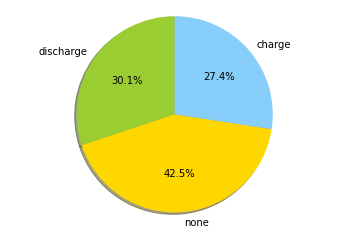

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.404314, -2933.969062, -2772.121851, -2417.5143, -2602.664373, -2258.714973, -2047.941451, -1955.048494, -1742.463017, -1696.438067, -1553.410772, -1509.748001, -1457.006325, -1425.264505, -1407.620036, -1390.235724, -1372.920329, -1362.11441, -1359.655597, -1365.344335, -1369.782456, -1370.63476, -1372.337534, -1376.757902, -1386.277322, -1388.325449, -1389.20614, -1397.570953, -1395.878471, -1400.241949, -1402.085093, -1404.82637, -1407.867145, -1405.751258, -1407.461009, -1409.986443, -1417.901669, -1425.944002], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2411.587655486306, -2194.736691654194, -2128.9976994878234, -1943.64730842485, -2100.267439974792, -1794.4590870779648, -1509.9597002434675, -1444.7307992079513, -1215.5877723490848, -1166.570664838102, -1139.090871508466, -1142.2925059138215, -1095.992

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-12-11-44_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-12-11-44_score:-2411.587655486306
train score:-3078.404314
new best best13_05_2022-12-11-44_score:-2194.736691654194
train score:-2934.005828
new best best13_05_2022-12-11-44_score:-2132.415054462719
train score:-2767.525634
new best best13_05_2022-12-11-44_score:-1933.4914271093803
train score:-2407.55043
new best best13_05_2022-12-11-44_score:-1805.3800769266381
train score:-2251.289478
new best best13_05_2022-12-11-44_score:-1504.414130108351
train score:-2050.32828
new best best13_05_2022-12-11-44_score:-1448.5413416690135
train score:-1939.766128
new best best13_05_2022-12-11-44_score:-1215.4111222719803
train score:-1744.979848
new best best13_05_2022-12-11-44_score:-1157.961749749622
train score:-1694.615919
new best best13_05_2022-12-11-44_score:-1140.7805827119519
train score:-1526.066301
new best best13_05_2022-12-11-44_score:-1138.7358701982666
train score:-1497.882626
n

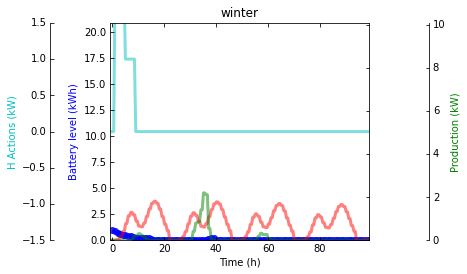

In this plot, total score5.28


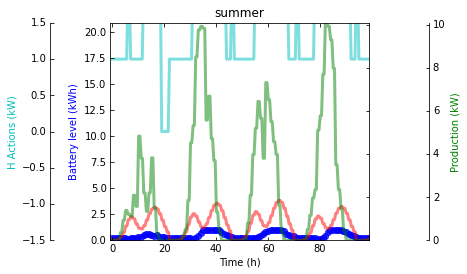

In this plot, total score-15.26368184313957


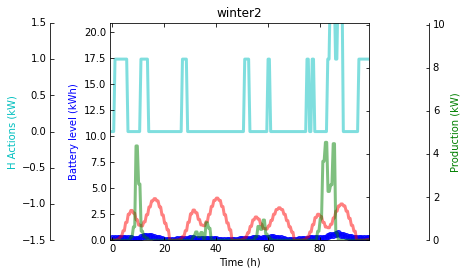

<Figure size 432x288 with 0 Axes>

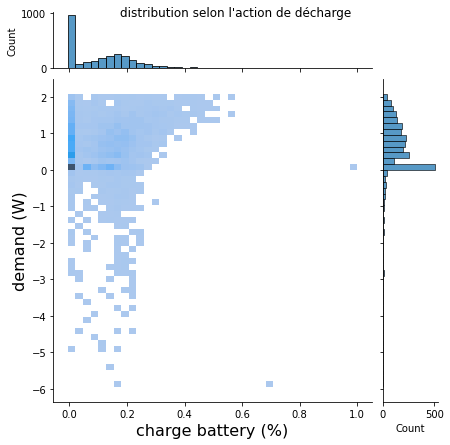

<Figure size 432x288 with 0 Axes>

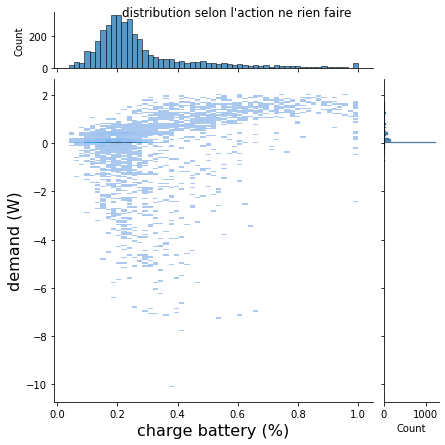

<Figure size 432x288 with 0 Axes>

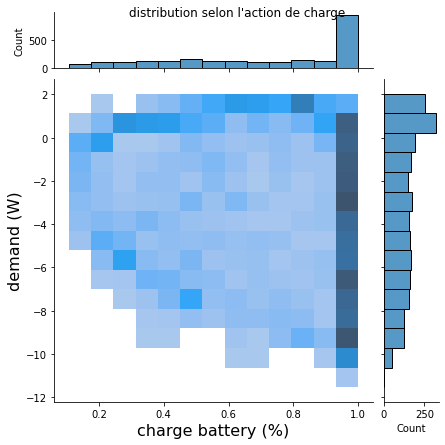

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

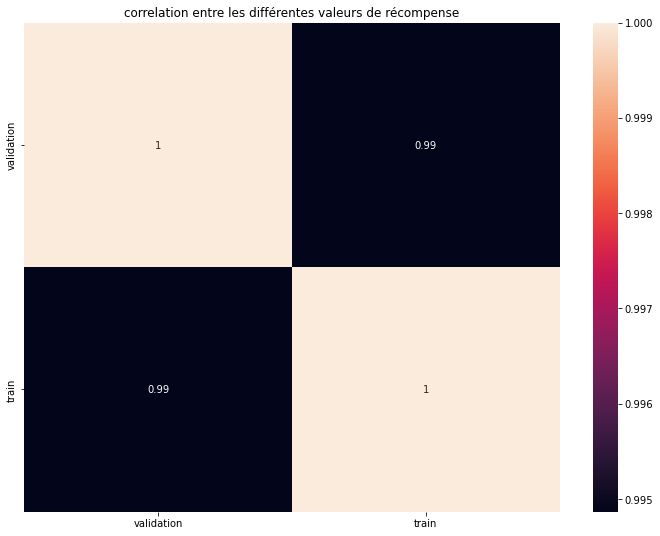

<Figure size 432x288 with 0 Axes>

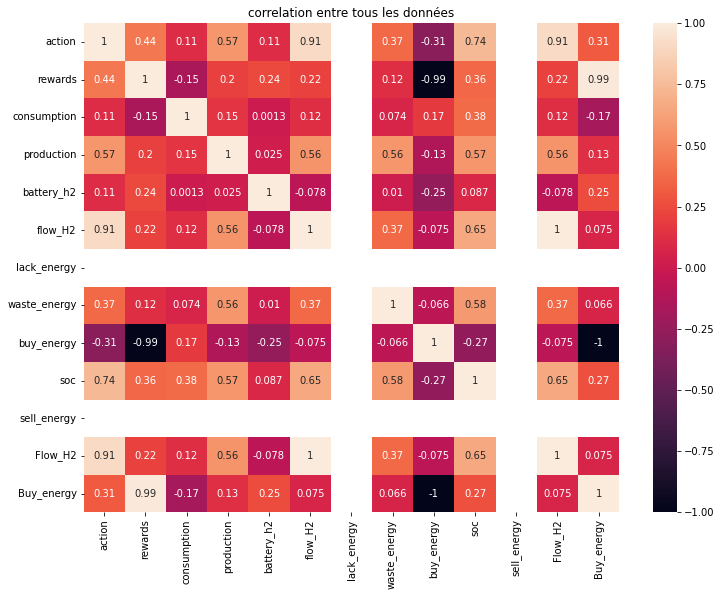

reward -996.1482260636619


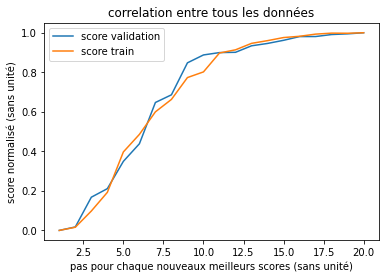

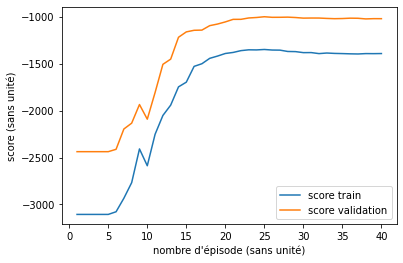

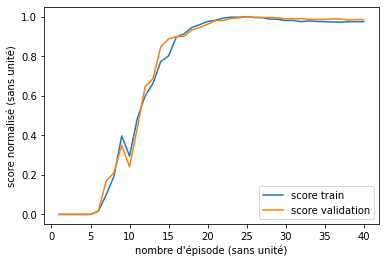

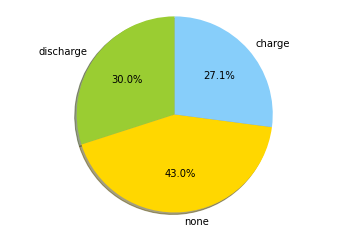

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.404314, -2934.005828, -2767.525634, -2407.55043, -2587.102528, -2251.289478, -2050.32828, -1939.766128, -1744.979848, -1694.615919, -1526.066301, -1497.882626, -1440.298119, -1416.063462, -1388.451873, -1377.326133, -1358.032673, -1349.253838, -1350.312816, -1345.724177, -1351.604433, -1352.67665, -1366.960165, -1368.512385, -1379.387147, -1378.778345, -1389.708598, -1383.555118, -1387.618059, -1389.559259, -1392.097609, -1393.655277, -1389.657391, -1390.169948, -1389.160988], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2411.587655486306, -2194.736691654194, -2132.415054462719, -1933.4914271093803, -2089.8725511136217, -1805.3800769266381, -1504.414130108351, -1448.5413416690135, -1215.4111222719803, -1157.961749749622, -1140.7805827119519, -1138.7358701982666, -1091.357448742645, -1074.1144963963307, -1051

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-12-25-35_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-12-25-35_score:-2411.587655486306
train score:-3078.404314
new best best13_05_2022-12-25-35_score:-2194.736691654194
train score:-2933.969062
new best best13_05_2022-12-25-35_score:-2132.415054462719
train score:-2767.489781
new best best13_05_2022-12-25-35_score:-1930.6274763953552
train score:-2396.578579
new best best13_05_2022-12-25-35_score:-1808.351302247931
train score:-2251.289478
new best best13_05_2022-12-25-35_score:-1502.8137629646008
train score:-2045.540584
new best best13_05_2022-12-25-35_score:-1440.9648911603945
train score:-1936.704117
new best best13_05_2022-12-25-35_score:-1225.8760993040196
train score:-1747.616964
new best best13_05_2022-12-25-35_score:-1165.8121159227157
train score:-1703.838075
new best best13_05_2022-12-25-35_score:-1147.3002503150274
train score:-1573.560687
new best best13_05_2022-12-25-35_score:-1141.8892593769706
train score:-1514.28952

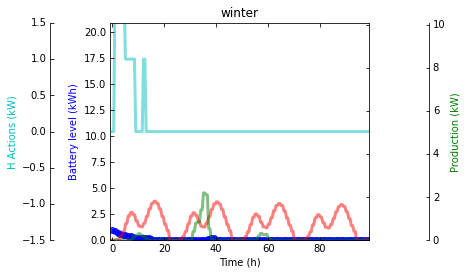

In this plot, total score5.279999999999999


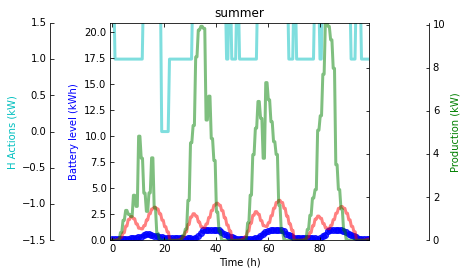

In this plot, total score-16.25160468623274


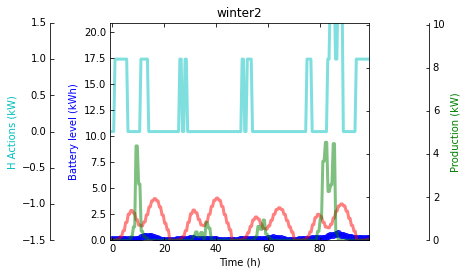

<Figure size 432x288 with 0 Axes>

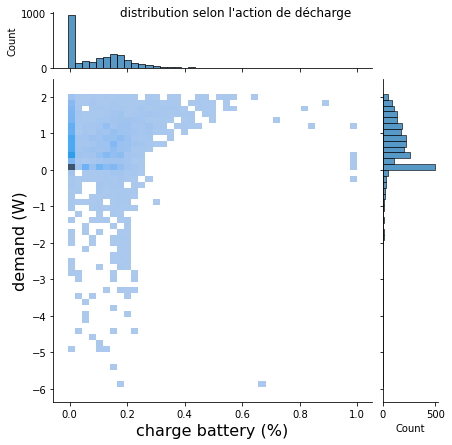

<Figure size 432x288 with 0 Axes>

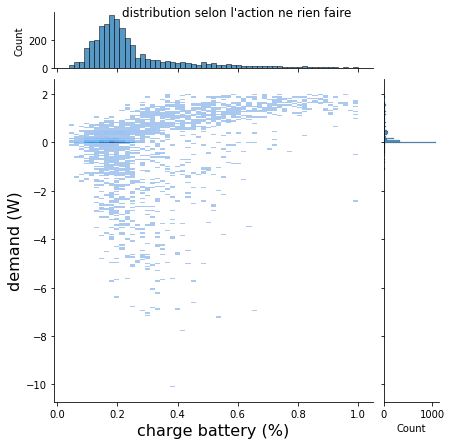

<Figure size 432x288 with 0 Axes>

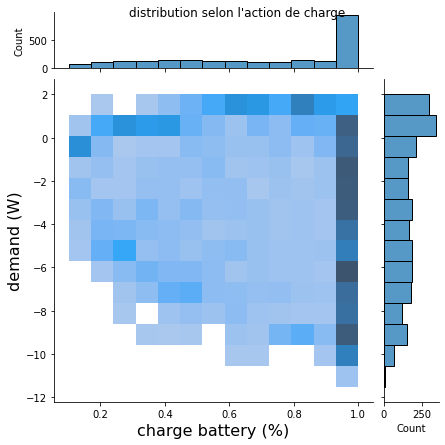

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

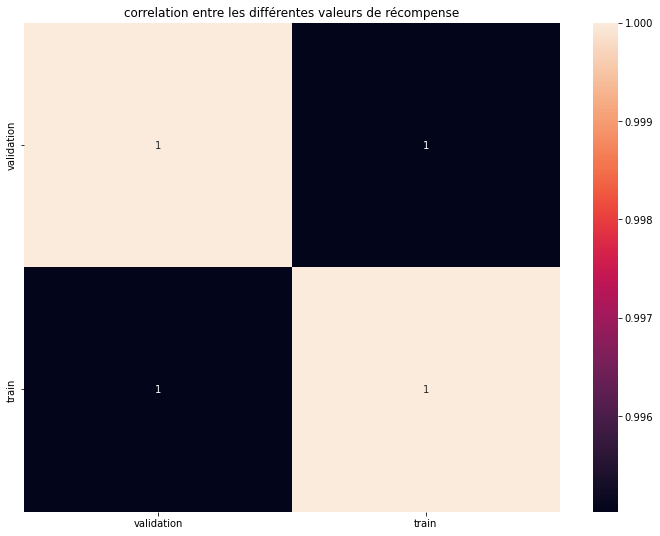

<Figure size 432x288 with 0 Axes>

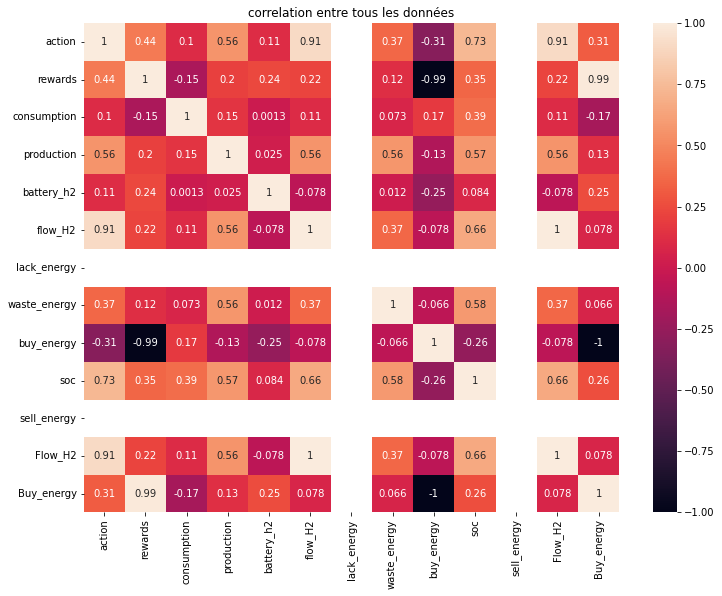

reward -1006.2719088031785


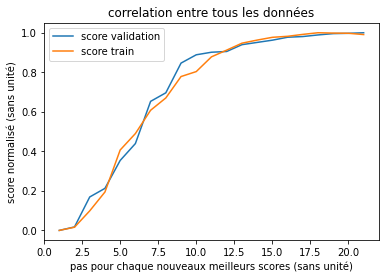

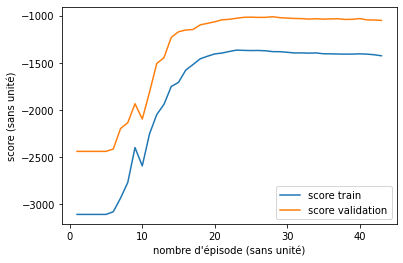

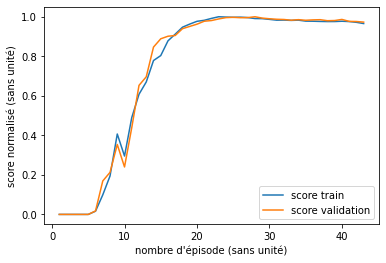

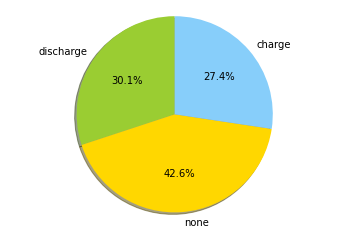

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.404314, -2933.969062, -2767.489781, -2396.578579, -2591.19801, -2251.289478, -2045.540584, -1936.704117, -1747.616964, -1703.838075, -1573.560687, -1514.289521, -1453.128713, -1425.702457, -1401.231391, -1392.260141, -1375.387499, -1360.834744, -1363.856488, -1365.593279, -1364.514913, -1368.043898, -1376.876368, -1377.686116, -1384.060033, -1391.132495, -1390.501186, -1393.210526, -1391.03653, -1399.545728, -1400.401126, -1402.292781, -1403.456307, -1403.214052, -1400.488844, -1403.447737, -1410.107794, -1421.065146], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2411.587655486306, -2194.736691654194, -2132.415054462719, -1930.6274763953552, -2093.4103381114764, -1808.351302247931, -1502.8137629646008, -1440.9648911603945, -1225.8760993040196, -1165.8121159227157, -1147.3002503150274, -1141.8892593769706, -1

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-12-40-42_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-12-40-42_score:-2411.587655486306
train score:-3078.404314
new best best13_05_2022-12-40-42_score:-2194.736691654194
train score:-2933.969062
new best best13_05_2022-12-40-42_score:-2132.415054462719
train score:-2767.489781
new best best13_05_2022-12-40-42_score:-1925.8963284206257
train score:-2396.578579
new best best13_05_2022-12-40-42_score:-1813.8639884036675
train score:-2252.576478
new best best13_05_2022-12-40-42_score:-1508.5295782852118
train score:-2052.101071
new best best13_05_2022-12-40-42_score:-1444.323794568445
train score:-1937.549907
new best best13_05_2022-12-40-42_score:-1231.0160386419884
train score:-1749.50056
new best best13_05_2022-12-40-42_score:-1185.000587508228
train score:-1715.399502
new best best13_05_2022-12-40-42_score:-1146.6455081784297
train score:-1589.298513
new best best13_05_2022-12-40-42_score:-1142.690452778188
train score:-1518.181479
n

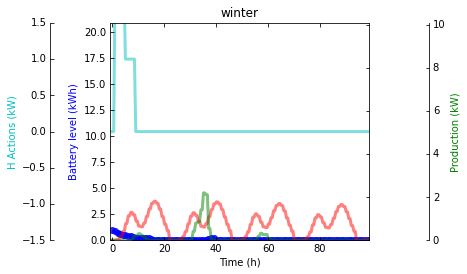

In this plot, total score5.28


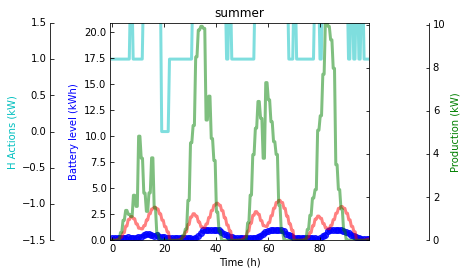

In this plot, total score-15.675377445367698


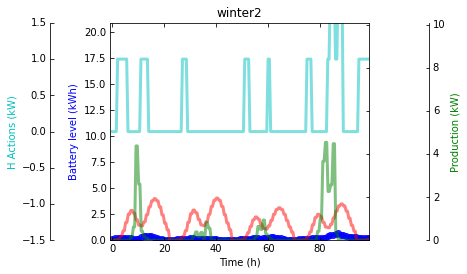

<Figure size 432x288 with 0 Axes>

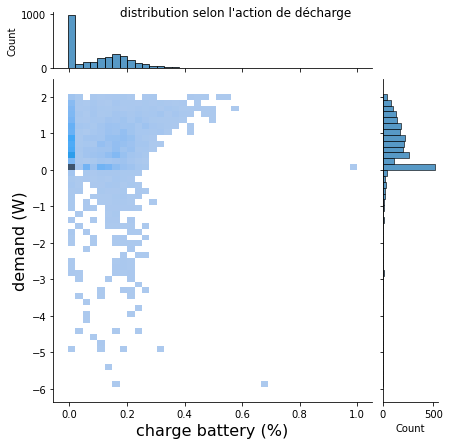

<Figure size 432x288 with 0 Axes>

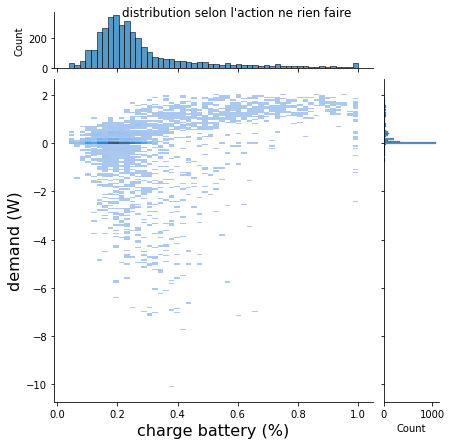

<Figure size 432x288 with 0 Axes>

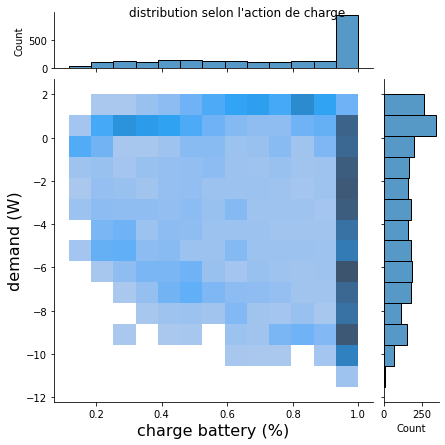

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

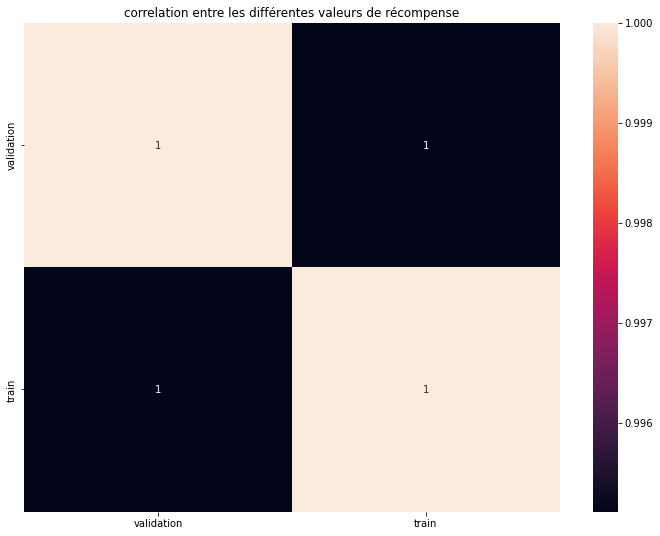

<Figure size 432x288 with 0 Axes>

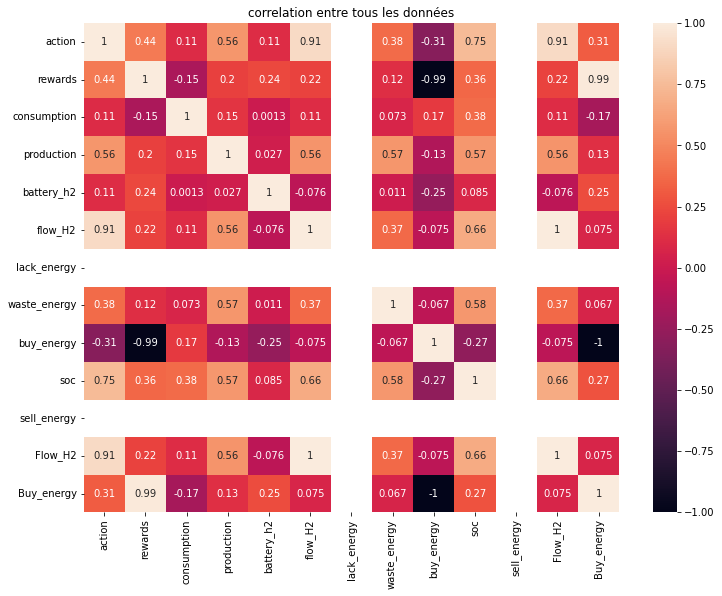

reward -1005.529811485127


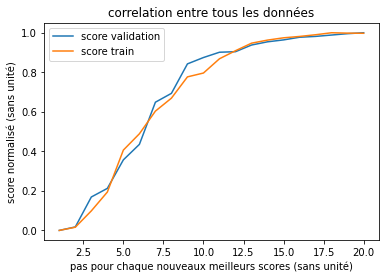

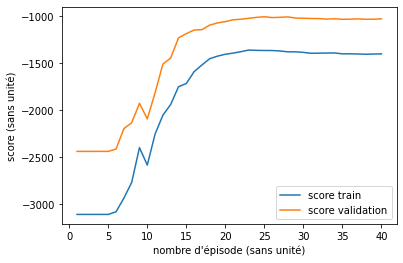

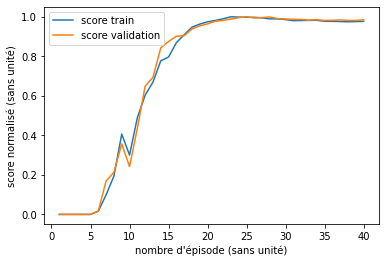

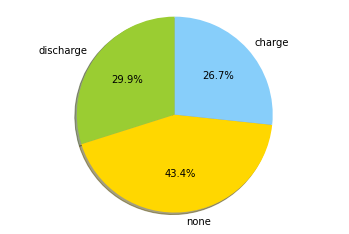

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.404314, -2933.969062, -2767.489781, -2396.578579, -2582.182094, -2252.576478, -2052.101071, -1937.549907, -1749.50056, -1715.399502, -1589.298513, -1518.181479, -1451.63123, -1424.342322, -1404.174276, -1392.081574, -1377.106481, -1359.369671, -1362.92669, -1364.132649, -1364.642396, -1369.137475, -1378.362405, -1378.208878, -1384.510806, -1393.905075, -1392.528807, -1391.526005, -1390.576046, -1399.792037, -1399.919376, -1401.604434, -1404.015469, -1402.168711, -1399.892766], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2411.587655486306, -2194.736691654194, -2132.415054462719, -1925.8963284206257, -2091.0350835102363, -1813.8639884036675, -1508.5295782852118, -1444.323794568445, -1231.0160386419884, -1185.000587508228, -1146.6455081784297, -1142.690452778188, -1094.474751473812, -1071.1736805452383, -1057.

C:\WorkSpace\code\venv\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
C:\WorkSpace\code\venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


new best best13_05_2022-12-54-43_score:-2436.79570018121
train score:-3106.721148
new best best13_05_2022-12-54-43_score:-2411.6232286484446
train score:-3078.404314
new best best13_05_2022-12-54-43_score:-2195.186169684399
train score:-2933.969062
new best best13_05_2022-12-54-43_score:-2132.4151691138177
train score:-2768.620872
new best best13_05_2022-12-54-43_score:-1916.6778227347168
train score:-2375.751638
new best best13_05_2022-12-54-43_score:-1831.2554577603805
train score:-2260.317131
new best best13_05_2022-12-54-43_score:-1514.1112041342203
train score:-2054.914677
new best best13_05_2022-12-54-43_score:-1452.7157374537492
train score:-1942.702176
new best best13_05_2022-12-54-43_score:-1233.3412455699436
train score:-1774.832021
new best best13_05_2022-12-54-43_score:-1232.2747154655444
train score:-1771.799447
new best best13_05_2022-12-54-43_score:-1135.017515414802
train score:-1598.958307
new best best13_05_2022-12-54-43_score:-1133.1357827348984
train score:-1516.956

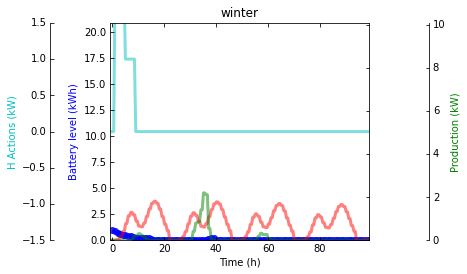

In this plot, total score5.28


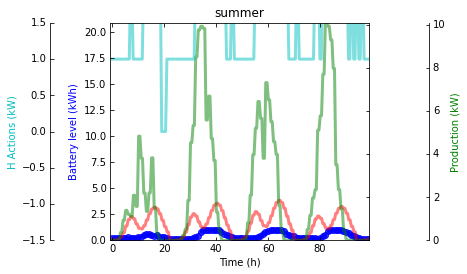

In this plot, total score-15.675377445367698


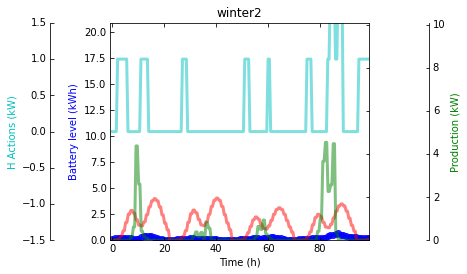

<Figure size 432x288 with 0 Axes>

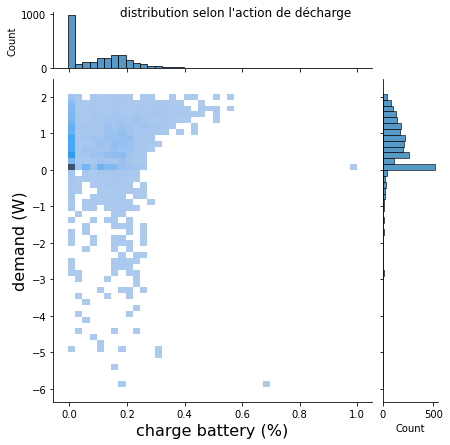

<Figure size 432x288 with 0 Axes>

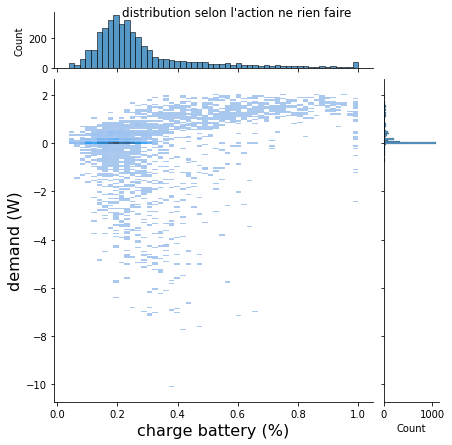

<Figure size 432x288 with 0 Axes>

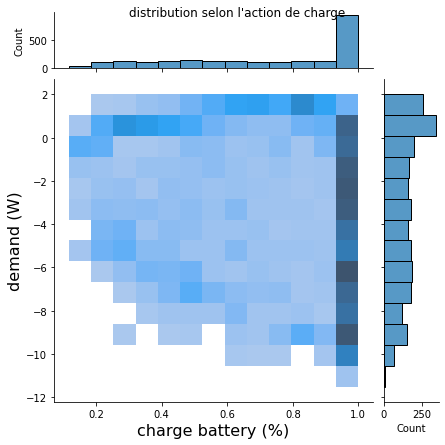

demande moyenne :  -0.7289690599108651
demande std :  2.602111036990436


<Figure size 432x288 with 0 Axes>

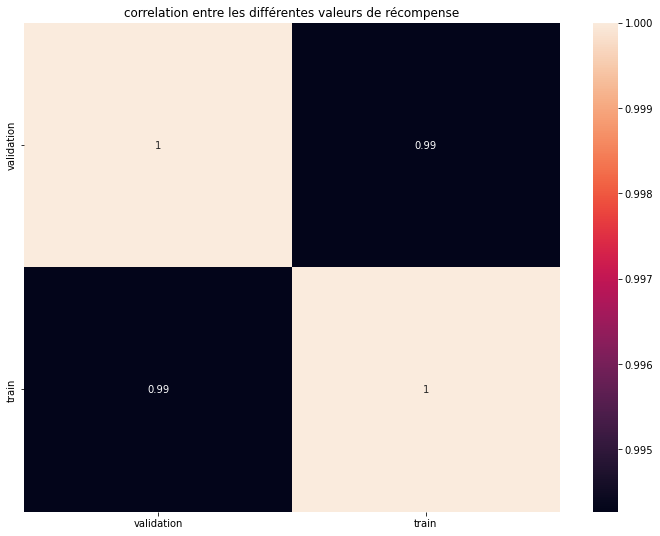

<Figure size 432x288 with 0 Axes>

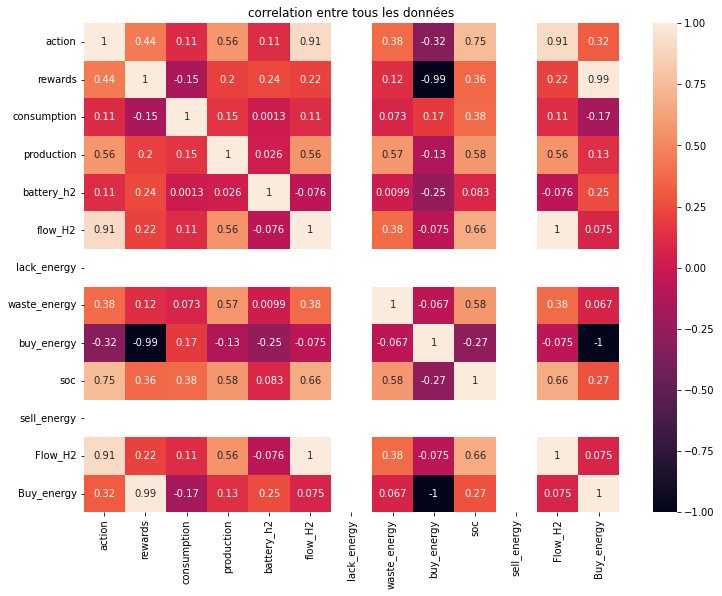

reward -1011.2354737189971


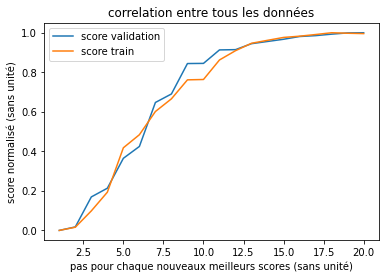

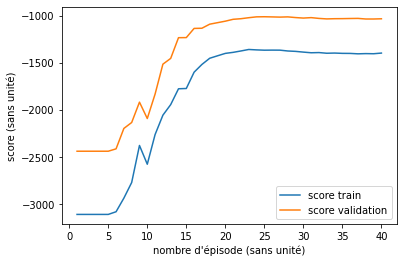

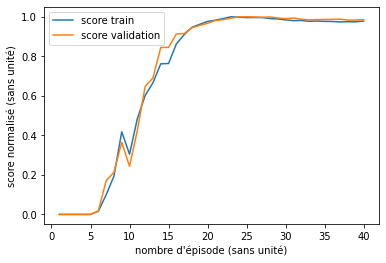

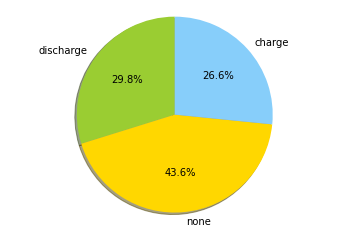

defaultdict(<class 'list'>, {'train': [-3106.721148, -3106.721148, -3106.721148, -3106.721148, -3106.721148, -3078.404314, -2933.969062, -2768.620872, -2375.751638, -2574.633849, -2260.317131, -2054.914677, -1942.702176, -1774.832021, -1771.799447, -1598.958307, -1516.956314, -1451.263581, -1425.223342, -1399.680483, -1388.72247, -1374.023891, -1358.235439, -1362.641353, -1365.777286, -1364.988722, -1365.442767, -1374.22968, -1378.314942, -1386.120482, -1393.054906, -1391.021541, -1398.202124, -1396.229278, -1399.390608, -1399.981161, -1404.298108, -1401.991915, -1403.379342, -1396.480578], 'validation': [-2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2436.79570018121, -2411.6232286484446, -2195.186169684399, -2132.4151691138177, -1916.6778227347168, -2090.184190050022, -1831.2554577603805, -1514.1112041342203, -1452.7157374537492, -1233.3412455699436, -1232.2747154655444, -1135.017515414802, -1133.1357827348984, -1090.0790391279734, -1074.134703376738, -1

In [13]:
import logging

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sys
import time

import tensorflow as tf
import pandas as pd
from stable_baselines3 import DQN

from sklearn import preprocessing
from microGrid.reward.reward import ClientReward

from datetime import datetime
import shutil

print(os.path.abspath(''))

sys.path.append(os.path.abspath(os.path.abspath('')))
print(os.path.abspath(os.path.abspath('')))


from microGrid.env.final_env import MyEnv as MG_two_storages_env
from microGrid.callback.callback import BestCallback
from microGrid.plot_MG_operation import plot_op

import random



class Defaults:
    # ----------------------
    # Experiment Parameters
    # ----------------------
    STEPS_PER_EPISODE = 365 * 24 - 1
    EPISODE = 200
    STEPS_PER_TEST = 365 * 24 - 1

    # ----------------------
    # Environment Parameters
    # ----------------------
    FRAME_SKIP = 1

    # ----------------------
    # DQN Agent parameters:
    # ----------------------
    UPDATE_RULE = 'rmsprop'
    LEARNING_RATE = 2e-2
    LEARNING_RATE_DECAY = 0.99
    DISCOUNT = 0.99
    DISCOUNT_INC = 0.99
    DISCOUNT_MAX = 0.98
    EPSILON_START = 1.0
    EPSILON_MIN = .1
    EPSILON_DECAY = 2.3e-7
    REPLAY_MEMORY_SIZE = 1000000
    BATCH_SIZE = 512#32
    FREEZE_INTERVAL = 1000
    DETERMINISTIC = False
    TARGET_UPDATE_INTERVAL = 2

class EnvParam:
    MAX_BUY_ENERGY = None
    MAX_SELL_ENERGY = 0
    PREDICTION = False
    EQUINOX = True
    LENGTH_HISTORY = 12

def main(tautau, seed):
    patience = 15
    dirname = "result_noteook"
    rng = np.random.RandomState()

    # --- Instantiate environment ---
    dict_env = dict()

    env = MG_two_storages_env(rng, pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                              length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                              max_ener_sell=EnvParam.MAX_SELL_ENERGY)
    absolute_dir = os.path.abspath('')
    prod = np.load(absolute_dir + "/microGrid/env/data/BelgiumPV_prod_test.npy")[0:1 * 365 * 24]
    cons = np.load(absolute_dir + "/microGrid/env/data/example_nondeterminist_cons_test.npy")[0:1 * 365 * 24]
    env_valid = MG_two_storages_env(rng, consumption=cons, production=prod,
                                    pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                                    length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                                    max_ener_sell=EnvParam.MAX_SELL_ENERGY)

    # optimisation énergie
    env_ener = MG_two_storages_env(rng, consumption=cons, production=prod,
                                   pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                                   length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                                   max_ener_sell=EnvParam.MAX_SELL_ENERGY)
    dict_env["energy"] = env_ener
    # ressenti client
    env_user = MG_two_storages_env(rng, consumption=cons, production=prod,
                                   pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                                   length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                                   max_ener_sell=EnvParam.MAX_SELL_ENERGY)
    dict_env["user"] = env_user
    # profit réseau
    env_profit = MG_two_storages_env(rng, consumption=cons, production=prod,
                                     pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                                     length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                                     max_ener_sell=EnvParam.MAX_SELL_ENERGY)
    dict_env["profit"] = env_profit
    # préservation des stockages
    env_stockage = MG_two_storages_env(rng, consumption=cons, production=prod,
                                       pred=EnvParam.PREDICTION, dist_equinox=EnvParam.EQUINOX,
                                       length_history=EnvParam.LENGTH_HISTORY, max_ener_buy=EnvParam.MAX_BUY_ENERGY,
                                       max_ener_sell=EnvParam.MAX_SELL_ENERGY)
    dict_env["stockage"] = env_stockage

    # --- Instantiate reward parameters ---
    price_h2 = 0.1  # 0.1euro/kWh of hydrogen
    price_elec_buy = 2.0  # 2euro/kWh
    cost_wast = 0.1  # arbitrary value
    reward_client = ClientReward()

    # --- comparative reward ---
    dict_env["energy"].add_reward("Waste", lambda x: -x["waste_energy"] * cost_wast, 1.)
    dict_env["profit"].add_reward("Profit", lambda x: (x["sell_energy"] - x["buy_energy"]) * price_elec_buy, 1.)
    dict_env["user"].add_reward("Dissatisfaction", lambda x: reward_client.fn(x), 1.)

    # --- train reward ---
    env.add_reward("Flow_H2", lambda x: x["flow_H2"] * price_h2, 1.)
    env.add_reward("Buy_energy", lambda x: -x["buy_energy"] * price_elec_buy, 1.)

    # --- validation reward ---
    env_valid.add_reward("Flow_H2", lambda x: x["flow_H2"] * price_h2, 1.)
    env_valid.add_reward("Buy_energy", lambda x: -x["buy_energy"] * price_elec_buy, 1.)

    print("tensorflow work with:", tf.test.gpu_device_name())
    
    logging.basicConfig(level=logging.INFO)
    
    random.seed(seed)
    pow_lr = 5
    train_freq = 2
    pow_replaybuff_size = 5
    pow_buff_size = 8
    discount= 0.7
    decay = 4*10**(-6)
    freeze = 50
    tau = tautau
    
    now = datetime.now()
    # dd_mm_YY-H-M-S
    dt_string = now.strftime("%d_%m_%Y-%H-%M-%S")
    filename = "best" + dt_string
    test(dirname, filename,
         patience,
         train_freq,
         learning_rate= 10**(-pow_lr),
         buffer_size= 10**(pow_replaybuff_size),
         batch_size = 2**(pow_buff_size),
         discount= discount,
         eps_decay=decay,
         freeze = freeze,
         dict_env={},
         env=env,
         env_valid=env_valid,
         verbose=True,
         tau=tau)

for toto in np.arange(0.1,1.,0.05):
    main(toto,3)
print("the end")